# Задача № 2. Бухгалтерска отчетность НКО (раздел 2 - анализ данных на поставленные вопросы)

***Работу выполнили Команда № 1 "Researchers"***
* Капитан команды: `Колесник Наталья`
* Члены команды:   `Григорьева Людмила, Ямилова Алсу`

In [1]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.neighbors import NearestNeighbors

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

pd.set_option('display.max_columns', 165)
# отключаем экспоненциальную запись
pd.set_option('display.float_format', lambda x: '%.2f' % x)

FONT_TITLE = 20
FONT_LABEL = 15

## Загрузка и подготовка данных

In [2]:
data = pd.read_csv("data_prepare.csv")

In [3]:
data.head(3)

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB","2021, Проценты к получению, KRUB","2017, Проценты к уплате, KRUB","2018, Проценты к уплате, KRUB","2019, Проценты к уплате, KRUB","2020, Проценты к уплате, KRUB","2021, Проценты к уплате, KRUB","2017, Прочие доходы, KRUB","2018, Прочие доходы, KRUB","2019, Прочие доходы, KRUB","2020, Прочие доходы, KRUB","2021, Прочие доходы, KRUB","2017, Прочие расходы, KRUB","2018, Прочие расходы, KRUB","2019, Прочие расходы, KRUB","2020, Прочие расходы, KRUB","2021, Прочие расходы, KRUB","2017, Прибыль (убыток) до налогообложения , KRUB","2018, Прибыль (убыток) до налогообложения , KRUB","2019, Прибыль (убыток) до налогообложения , KRUB","2020, Прибыль (убыток) до налогообложения , KRUB","2021, Прибыль (убыток) до налогообложения , KRUB","2017, Текущий налог на прибыль, KRUB","2018, Текущий налог на прибыль, KRUB","2019, Текущий налог на прибыль, KRUB","2020, Текущий налог на прибыль, KRUB","2021, Текущий налог на прибыль, KRUB","2017, Чистая прибыль (убыток), KRUB","2018, Чистая прибыль (убыток), KRUB","2019, Чистая прибыль (убыток), KRUB","2020, 

In [4]:
org_col = ['Наименование', 'Регистрационный номер', 'Дата регистрации', 'Год_регистрации', 'Статус', 'Код налогоплательщика','Организационно-правовая форма']

In [5]:
data[["APEP", "AAEP"]].describe()

,APEP,AAEP
count,6289.00,6289.00
mean,49.95,17.02
std,44.55,122.76
min,0.00,0.00
25%,0.00,0.00
50%,64.62,2.19
75%,92.32,17.51
max,906.37,9500.00


В данных показателях есть странно большие значения, посмотрим на них

In [6]:
data[data["APEP"] == data["APEP"].max()]

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB","2021, Проценты к получению, KRUB","2017, Проценты к уплате, KRUB","2018, Проценты к уплате, KRUB","2019, Проценты к уплате, KRUB","2020, Проценты к уплате, KRUB","2021, Проценты к уплате, KRUB","2017, Прочие доходы, KRUB","2018, Прочие доходы, KRUB","2019, Прочие доходы, KRUB","2020, Прочие доходы, KRUB","2021, Прочие доходы, KRUB","2017, Прочие расходы, KRUB","2018, Прочие расходы, KRUB","2019, Прочие расходы, KRUB","2020, Прочие расходы, KRUB","2021, Прочие расходы, KRUB","2017, Прибыль (убыток) до налогообложения , KRUB","2018, Прибыль (убыток) до налогообложения , KRUB","2019, Прибыль (убыток) до налогообложения , KRUB","2020, Прибыль (убыток) до налогообложения , KRUB","2021, Прибыль (убыток) до налогообложения , KRUB","2017, Текущий налог на прибыль, KRUB","2018, Текущий налог на прибыль, KRUB","2019, Текущий налог на прибыль, KRUB","2020, Текущий налог на прибыль, KRUB","2021, Текущий налог на прибыль, KRUB","2017, Чистая прибыль (убыток), KRUB","2018, Чистая прибыль (убыток), KRUB","2019, Чистая прибыль (убыток), KRUB","2020, 

Отчеты о целевом использовании денежных средств за 2017-2021 заполнены некорректно, т.к. только в 2020 г отражено всего использовано средств, хотя расходы на целевые мероприятия указаны в 2-х годах в 2019 и 2020 гг., при этом в 2019 это значительная сумму в размере 4069 тыс.руб. Удалим эту компанию из анализа

In [7]:
data.drop(data[data["APEP"] == data["APEP"].max()].index, axis=0, inplace=True)

In [8]:
data[data["APEP"] == data["APEP"].max()]

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB","2021, Проценты к получению, KRUB","2017, Проценты к уплате, KRUB","2018, Проценты к уплате, KRUB","2019, Проценты к уплате, KRUB","2020, Проценты к уплате, KRUB","2021, Проценты к уплате, KRUB","2017, Прочие доходы, KRUB","2018, Прочие доходы, KRUB","2019, Прочие доходы, KRUB","2020, Прочие доходы, KRUB","2021, Прочие доходы, KRUB","2017, Прочие расходы, KRUB","2018, Прочие расходы, KRUB","2019, Прочие расходы, KRUB","2020, Прочие расходы, KRUB","2021, Прочие расходы, KRUB","2017, Прибыль (убыток) до налогообложения , KRUB","2018, Прибыль (убыток) до налогообложения , KRUB","2019, Прибыль (убыток) до налогообложения , KRUB","2020, Прибыль (убыток) до налогообложения , KRUB","2021, Прибыль (убыток) до налогообложения , KRUB","2017, Текущий налог на прибыль, KRUB","2018, Текущий налог на прибыль, KRUB","2019, Текущий налог на прибыль, KRUB","2020, Текущий налог на прибыль, KRUB","2021, Текущий налог на прибыль, KRUB","2017, Чистая прибыль (убыток), KRUB","2018, Чистая прибыль (убыток), KRUB","2019, Чистая прибыль (убыток), KRUB","2020, 

По этой организации тоже неправильно составлен отчет, удалим и ее

In [9]:
data.drop(data[data["APEP"] == data["APEP"].max()].index, axis=0, inplace=True)

In [10]:
data[data["APEP"] == data["APEP"].max()]

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB","2021, Проценты к получению, KRUB","2017, Проценты к уплате, KRUB","2018, Проценты к уплате, KRUB","2019, Проценты к уплате, KRUB","2020, Проценты к уплате, KRUB","2021, Проценты к уплате, KRUB","2017, Прочие доходы, KRUB","2018, Прочие доходы, KRUB","2019, Прочие доходы, KRUB","2020, Прочие доходы, KRUB","2021, Прочие доходы, KRUB","2017, Прочие расходы, KRUB","2018, Прочие расходы, KRUB","2019, Прочие расходы, KRUB","2020, Прочие расходы, KRUB","2021, Прочие расходы, KRUB","2017, Прибыль (убыток) до налогообложения , KRUB","2018, Прибыль (убыток) до налогообложения , KRUB","2019, Прибыль (убыток) до налогообложения , KRUB","2020, Прибыль (убыток) до налогообложения , KRUB","2021, Прибыль (убыток) до налогообложения , KRUB","2017, Текущий налог на прибыль, KRUB","2018, Текущий налог на прибыль, KRUB","2019, Текущий налог на прибыль, KRUB","2020, Текущий налог на прибыль, KRUB","2021, Текущий налог на прибыль, KRUB","2017, Чистая прибыль (убыток), KRUB","2018, Чистая прибыль (убыток), KRUB","2019, Чистая прибыль (убыток), KRUB","2020, 

In [11]:
data.drop(data[data["APEP"] == data["APEP"].max()].index, axis=0, inplace=True)

In [12]:
data[data["APEP"] == data["APEP"].max()]

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB","2021, Проценты к получению, KRUB","2017, Проценты к уплате, KRUB","2018, Проценты к уплате, KRUB","2019, Проценты к уплате, KRUB","2020, Проценты к уплате, KRUB","2021, Проценты к уплате, KRUB","2017, Прочие доходы, KRUB","2018, Прочие доходы, KRUB","2019, Прочие доходы, KRUB","2020, Прочие доходы, KRUB","2021, Прочие доходы, KRUB","2017, Прочие расходы, KRUB","2018, Прочие расходы, KRUB","2019, Прочие расходы, KRUB","2020, Прочие расходы, KRUB","2021, Прочие расходы, KRUB","2017, Прибыль (убыток) до налогообложения , KRUB","2018, Прибыль (убыток) до налогообложения , KRUB","2019, Прибыль (убыток) до налогообложения , KRUB","2020, Прибыль (убыток) до налогообложения , KRUB","2021, Прибыль (убыток) до налогообложения , KRUB","2017, Текущий налог на прибыль, KRUB","2018, Текущий налог на прибыль, KRUB","2019, Текущий налог на прибыль, KRUB","2020, Текущий налог на прибыль, KRUB","2021, Текущий налог на прибыль, KRUB","2017, Чистая прибыль (убыток), KRUB","2018, Чистая прибыль (убыток), KRUB","2019, Чистая прибыль (убыток), KRUB","2020, 

In [13]:
data.drop(data[data["APEP"] == data["APEP"].max()].index, axis=0, inplace=True)

In [14]:
data[data["APEP"] == data["APEP"].max()]

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB","2021, Проценты к получению, KRUB","2017, Проценты к уплате, KRUB","2018, Проценты к уплате, KRUB","2019, Проценты к уплате, KRUB","2020, Проценты к уплате, KRUB","2021, Проценты к уплате, KRUB","2017, Прочие доходы, KRUB","2018, Прочие доходы, KRUB","2019, Прочие доходы, KRUB","2020, Прочие доходы, KRUB","2021, Прочие доходы, KRUB","2017, Прочие расходы, KRUB","2018, Прочие расходы, KRUB","2019, Прочие расходы, KRUB","2020, Прочие расходы, KRUB","2021, Прочие расходы, KRUB","2017, Прибыль (убыток) до налогообложения , KRUB","2018, Прибыль (убыток) до налогообложения , KRUB","2019, Прибыль (убыток) до налогообложения , KRUB","2020, Прибыль (убыток) до налогообложения , KRUB","2021, Прибыль (убыток) до налогообложения , KRUB","2017, Текущий налог на прибыль, KRUB","2018, Текущий налог на прибыль, KRUB","2019, Текущий налог на прибыль, KRUB","2020, Текущий налог на прибыль, KRUB","2021, Текущий налог на прибыль, KRUB","2017, Чистая прибыль (убыток), KRUB","2018, Чистая прибыль (убыток), KRUB","2019, Чистая прибыль (убыток), KRUB","2020, 

In [15]:
data.drop(data[data["APEP"] == data["APEP"].max()].index, axis=0, inplace=True)

In [16]:
data[data["APEP"] == data["APEP"].max()]

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB","2021, Проценты к получению, KRUB","2017, Проценты к уплате, KRUB","2018, Проценты к уплате, KRUB","2019, Проценты к уплате, KRUB","2020, Проценты к уплате, KRUB","2021, Проценты к уплате, KRUB","2017, Прочие доходы, KRUB","2018, Прочие доходы, KRUB","2019, Прочие доходы, KRUB","2020, Прочие доходы, KRUB","2021, Прочие доходы, KRUB","2017, Прочие расходы, KRUB","2018, Прочие расходы, KRUB","2019, Прочие расходы, KRUB","2020, Прочие расходы, KRUB","2021, Прочие расходы, KRUB","2017, Прибыль (убыток) до налогообложения , KRUB","2018, Прибыль (убыток) до налогообложения , KRUB","2019, Прибыль (убыток) до налогообложения , KRUB","2020, Прибыль (убыток) до налогообложения , KRUB","2021, Прибыль (убыток) до налогообложения , KRUB","2017, Текущий налог на прибыль, KRUB","2018, Текущий налог на прибыль, KRUB","2019, Текущий налог на прибыль, KRUB","2020, Текущий налог на прибыль, KRUB","2021, Текущий налог на прибыль, KRUB","2017, Чистая прибыль (убыток), KRUB","2018, Чистая прибыль (убыток), KRUB","2019, Чистая прибыль (убыток), KRUB","2020, 

*Пока на этом остановимся с удалением компаний по этому показателю*

In [17]:
data[data["AAEP"] == data["AAEP"].max()]

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB","2021, Проценты к получению, KRUB","2017, Проценты к уплате, KRUB","2018, Проценты к уплате, KRUB","2019, Проценты к уплате, KRUB","2020, Проценты к уплате, KRUB","2021, Проценты к уплате, KRUB","2017, Прочие доходы, KRUB","2018, Прочие доходы, KRUB","2019, Прочие доходы, KRUB","2020, Прочие доходы, KRUB","2021, Прочие доходы, KRUB","2017, Прочие расходы, KRUB","2018, Прочие расходы, KRUB","2019, Прочие расходы, KRUB","2020, Прочие расходы, KRUB","2021, Прочие расходы, KRUB","2017, Прибыль (убыток) до налогообложения , KRUB","2018, Прибыль (убыток) до налогообложения , KRUB","2019, Прибыль (убыток) до налогообложения , KRUB","2020, Прибыль (убыток) до налогообложения , KRUB","2021, Прибыль (убыток) до налогообложения , KRUB","2017, Текущий налог на прибыль, KRUB","2018, Текущий налог на прибыль, KRUB","2019, Текущий налог на прибыль, KRUB","2020, Текущий налог на прибыль, KRUB","2021, Текущий налог на прибыль, KRUB","2017, Чистая прибыль (убыток), KRUB","2018, Чистая прибыль (убыток), KRUB","2019, Чистая прибыль (убыток), KRUB","2020, 

In [18]:
data.drop(data[data["AAEP"] == data["AAEP"].max()].index, axis=0, inplace=True)

In [19]:
data[data["AAEP"] == data["AAEP"].max()]

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB","2021, Проценты к получению, KRUB","2017, Проценты к уплате, KRUB","2018, Проценты к уплате, KRUB","2019, Проценты к уплате, KRUB","2020, Проценты к уплате, KRUB","2021, Проценты к уплате, KRUB","2017, Прочие доходы, KRUB","2018, Прочие доходы, KRUB","2019, Прочие доходы, KRUB","2020, Прочие доходы, KRUB","2021, Прочие доходы, KRUB","2017, Прочие расходы, KRUB","2018, Прочие расходы, KRUB","2019, Прочие расходы, KRUB","2020, Прочие расходы, KRUB","2021, Прочие расходы, KRUB","2017, Прибыль (убыток) до налогообложения , KRUB","2018, Прибыль (убыток) до налогообложения , KRUB","2019, Прибыль (убыток) до налогообложения , KRUB","2020, Прибыль (убыток) до налогообложения , KRUB","2021, Прибыль (убыток) до налогообложения , KRUB","2017, Текущий налог на прибыль, KRUB","2018, Текущий налог на прибыль, KRUB","2019, Текущий налог на прибыль, KRUB","2020, Текущий налог на прибыль, KRUB","2021, Текущий налог на прибыль, KRUB","2017, Чистая прибыль (убыток), KRUB","2018, Чистая прибыль (убыток), KRUB","2019, Чистая прибыль (убыток), KRUB","2020, 

In [20]:
data.drop(data[data["AAEP"] == data["AAEP"].max()].index, axis=0, inplace=True)

In [21]:
data[data["AAEP"] == data["AAEP"].max()]

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB","2021, Проценты к получению, KRUB","2017, Проценты к уплате, KRUB","2018, Проценты к уплате, KRUB","2019, Проценты к уплате, KRUB","2020, Проценты к уплате, KRUB","2021, Проценты к уплате, KRUB","2017, Прочие доходы, KRUB","2018, Прочие доходы, KRUB","2019, Прочие доходы, KRUB","2020, Прочие доходы, KRUB","2021, Прочие доходы, KRUB","2017, Прочие расходы, KRUB","2018, Прочие расходы, KRUB","2019, Прочие расходы, KRUB","2020, Прочие расходы, KRUB","2021, Прочие расходы, KRUB","2017, Прибыль (убыток) до налогообложения , KRUB","2018, Прибыль (убыток) до налогообложения , KRUB","2019, Прибыль (убыток) до налогообложения , KRUB","2020, Прибыль (убыток) до налогообложения , KRUB","2021, Прибыль (убыток) до налогообложения , KRUB","2017, Текущий налог на прибыль, KRUB","2018, Текущий налог на прибыль, KRUB","2019, Текущий налог на прибыль, KRUB","2020, Текущий налог на прибыль, KRUB","2021, Текущий налог на прибыль, KRUB","2017, Чистая прибыль (убыток), KRUB","2018, Чистая прибыль (убыток), KRUB","2019, Чистая прибыль (убыток), KRUB","2020, 

In [22]:
data.drop(data[data["AAEP"] == data["AAEP"].max()].index, axis=0, inplace=True)

In [23]:
data[data["AAEP"] == data["AAEP"].max()]

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB","2021, Проценты к получению, KRUB","2017, Проценты к уплате, KRUB","2018, Проценты к уплате, KRUB","2019, Проценты к уплате, KRUB","2020, Проценты к уплате, KRUB","2021, Проценты к уплате, KRUB","2017, Прочие доходы, KRUB","2018, Прочие доходы, KRUB","2019, Прочие доходы, KRUB","2020, Прочие доходы, KRUB","2021, Прочие доходы, KRUB","2017, Прочие расходы, KRUB","2018, Прочие расходы, KRUB","2019, Прочие расходы, KRUB","2020, Прочие расходы, KRUB","2021, Прочие расходы, KRUB","2017, Прибыль (убыток) до налогообложения , KRUB","2018, Прибыль (убыток) до налогообложения , KRUB","2019, Прибыль (убыток) до налогообложения , KRUB","2020, Прибыль (убыток) до налогообложения , KRUB","2021, Прибыль (убыток) до налогообложения , KRUB","2017, Текущий налог на прибыль, KRUB","2018, Текущий налог на прибыль, KRUB","2019, Текущий налог на прибыль, KRUB","2020, Текущий налог на прибыль, KRUB","2021, Текущий налог на прибыль, KRUB","2017, Чистая прибыль (убыток), KRUB","2018, Чистая прибыль (убыток), KRUB","2019, Чистая прибыль (убыток), KRUB","2020, 

*Пока на этом остановимся с удалением компаний по этому показателю*

In [24]:
data[["APEP", "AAEP"]].describe()

,APEP,AAEP
count,6281.00,6281.00
mean,49.73,15.38
std,43.00,26.53
min,0.00,0.00
25%,0.00,0.00
50%,64.61,2.18
75%,92.26,17.46
max,146.35,126.17


In [25]:
data.shape

(6281, 161)

***В итоге мы еще удалили 8 компаний из-за некорректных данных в отчетности, на самом деле их еще больше...***

In [26]:
# добавим сводные данные за 5-ний период по следующим признакам
data["Целевые поступления_всего, KRUB"] = data["2017, Целевые поступления, KRUB"] + data["2018, Целевые поступления, KRUB"] +\
    data["2019, Целевые поступления, KRUB"] + data["2020, Целевые поступления, KRUB"] +\
    data["2021, Целевые поступления, KRUB"]
data["Расходы на целевые мероприятия_всего, KRUB"] = data["2017, Расходы на целевые мероприятия, KRUB"] +\
    data["2018, Расходы на целевые мероприятия, KRUB"] +\
    data["2019, Расходы на целевые мероприятия, KRUB"] +\
    data["2020, Расходы на целевые мероприятия, KRUB"] +\
    data["2021, Расходы на целевые мероприятия, KRUB"]

Как идея может кластеризовать по суммам финансирования (примерно разделить по группам по перцентилям или градации по суммам).
Так как это существенный показатель деятельности и масштаба НКО

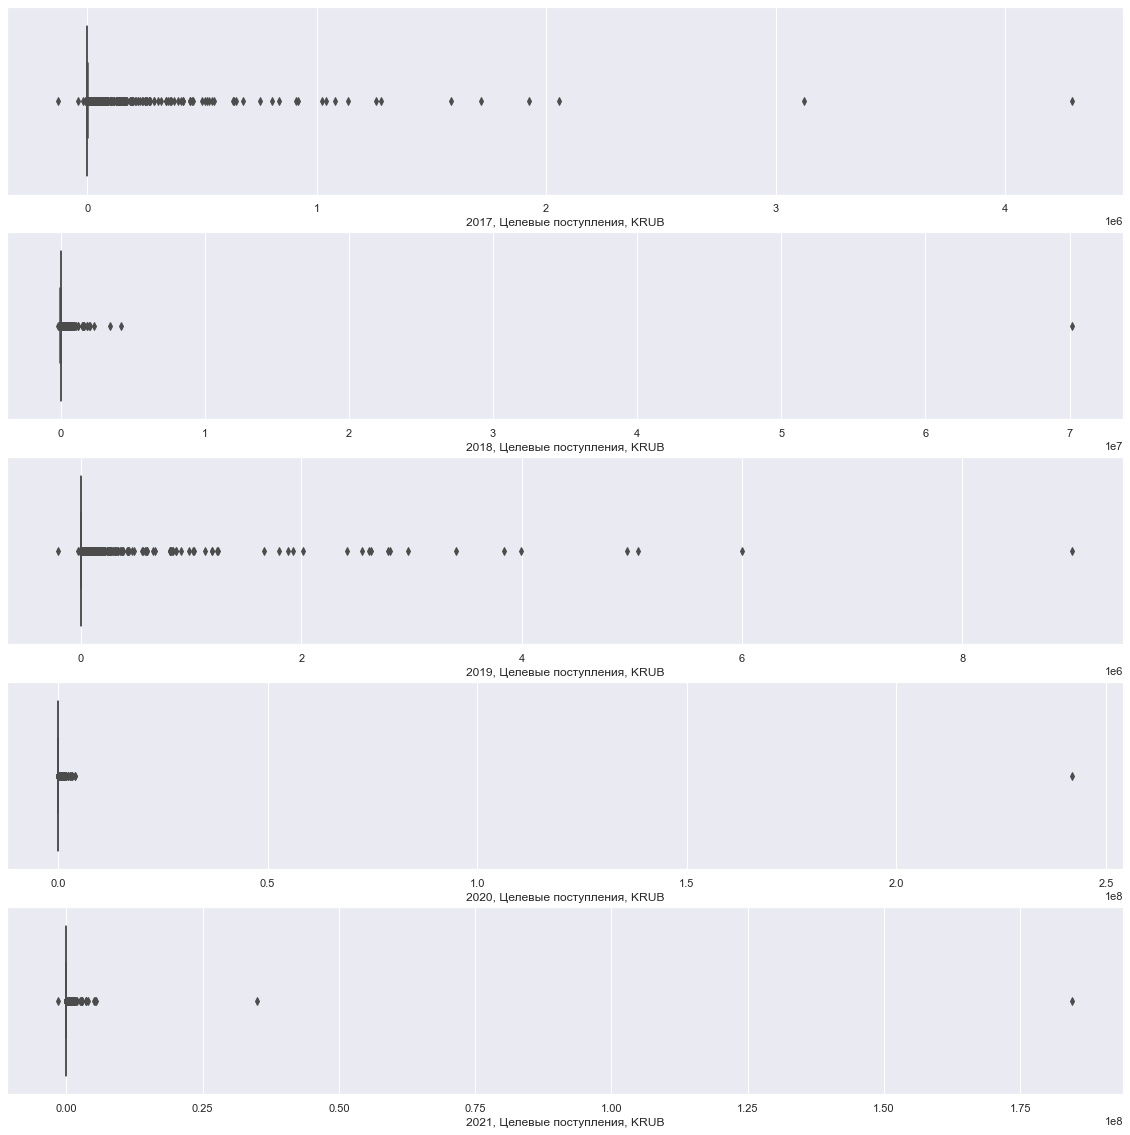

In [27]:
col = [f'{i}, Целевые поступления, KRUB' for i in range(2017, 2022) ]

fig, ax = plt.subplots(5, 1, figsize=(20,20))

for i in range(5):
    sns.boxplot(x=data[col[i]], ax=ax[i])
plt.show();

In [28]:
data[col].describe()

,"2017, Целевые поступления, KRUB","2018, Целевые поступления, KRUB","2019, Целевые поступления, KRUB","2020, Целевые поступления, KRUB","2021, Целевые поступления, KRUB"
count,6281.00,6281.00,6281.00,6281.00,6281.00
mean,10618.19,24819.06,20547.23,59135.04,59185.35
std,98784.97,893126.83,218895.55,3057449.47,2378946.69
min,-128145.00,-178738.00,-209219.00,-24446.00,-1519367.00
25%,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,3.00,12.00,18.00
75%,714.00,1235.00,1425.00,1648.00,1854.00
max,4293459.00,70198191.00,9000000.00,241986640.00,184577693.00


Странно, что есть отрицательные значения финансирования. Наверно ошибка. Или был возврат целевых поступлений, или ошибки при заполнении формы? каждый год это порядка 104-187 (за 5 лет 429 организаций)

У 50% организаций отсутствуют целевые поступления. А это является основным источником поступления денежных средств для НКО для выполнения своей уставной деятелльности. Так же есть несколько организаций с очень большими поступлениями. 

In [29]:
data.sort_values('2017, Целевые поступления, KRUB', ascending=False)[
    ["2017, Целевые поступления, KRUB", "2017, Прибыль от приносящей доход деятельности, KRUB",\
     "2017, Всего поступило средств, KRUB"]][:10]

,"2017, Целевые поступления, KRUB","2017, Прибыль от приносящей доход деятельности, KRUB","2017, Всего поступило средств, KRUB"
1107,4293459.00,11535.00,4304994.00
5919,3124900.00,101382.00,3226282.00
1055,2057078.00,27412.00,2084490.00
1276,1923231.00,0.00,1923231.00
665,1715385.00,0.00,1715385.00
1259,1585261.00,0.00,1585261.00
3525,1279853.00,6732.00,1286585.00
2521,1256400.00,0.00,1256400.00
1502,1136329.00,261132.00,1397461.00
2361,1080249.00,17332.00,1097581.00


In [30]:
data[(data['2017, Целевые поступления, KRUB']<0) & (data['2018, Целевые поступления, KRUB']<0) & 
    (data['2019, Целевые поступления, KRUB']<0) & (data['2020, Целевые поступления, KRUB']<0) & 
    (data['2021, Целевые поступления, KRUB']<0)][["2017, Всего поступило средств, KRUB",\
                                                  "2017, Прибыль от приносящей доход деятельности, KRUB"]]

,"2017, Всего поступило средств, KRUB","2017, Прибыль от приносящей доход деятельности, KRUB"
760,0.00,11.00
1332,0.00,100.00
1819,0.00,415.00
1823,0.00,1615.00
3628,20.00,1403.00
4843,0.00,201.00
4994,0.00,216.00
5981,0.00,23.00
6126,0.00,50.00
6219,0.00,9926.00


In [31]:
# Всегда отрицательная
mask = data[(data['2017, Целевые поступления, KRUB']<0) & (data['2018, Целевые поступления, KRUB']<0) & 
    (data['2019, Целевые поступления, KRUB']<0) & (data['2020, Целевые поступления, KRUB']<0) & 
    (data['2021, Целевые поступления, KRUB']<0)]
display(mask)
print(len(mask))

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB","2021, Проценты к получению, KRUB","2017, Проценты к уплате, KRUB","2018, Проценты к уплате, KRUB","2019, Проценты к уплате, KRUB","2020, Проценты к уплате, KRUB","2021, Проценты к уплате, KRUB","2017, Прочие доходы, KRUB","2018, Прочие доходы, KRUB","2019, Прочие доходы, KRUB","2020, Прочие доходы, KRUB","2021, Прочие доходы, KRUB","2017, Прочие расходы, KRUB","2018, Прочие расходы, KRUB","2019, Прочие расходы, KRUB","2020, Прочие расходы, KRUB","2021, Прочие расходы, KRUB","2017, Прибыль (убыток) до налогообложения , KRUB","2018, Прибыль (убыток) до налогообложения , KRUB","2019, Прибыль (убыток) до налогообложения , KRUB","2020, Прибыль (убыток) до налогообложения , KRUB","2021, Прибыль (убыток) до налогообложения , KRUB","2017, Текущий налог на прибыль, KRUB","2018, Текущий налог на прибыль, KRUB","2019, Текущий налог на прибыль, KRUB","2020, Текущий налог на прибыль, KRUB","2021, Текущий налог на прибыль, KRUB","2017, Чистая прибыль (убыток), KRUB","2018, Чистая прибыль (убыток), KRUB","2019, Чистая прибыль (убыток), KRUB","2020, 

10


In [32]:
# удалим эти компании
data.drop(mask.index, axis=0, inplace=True)

In [33]:
# Хоть раз  отрицательная
mask = data[(data['2017, Целевые поступления, KRUB']<0) | (data['2018, Целевые поступления, KRUB']<0) | 
    (data['2019, Целевые поступления, KRUB']<0) | (data['2020, Целевые поступления, KRUB']<0) | 
    (data['2021, Целевые поступления, KRUB']<0)]
display(mask)
print(len(mask))

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB","2021, Проценты к получению, KRUB","2017, Проценты к уплате, KRUB","2018, Проценты к уплате, KRUB","2019, Проценты к уплате, KRUB","2020, Проценты к уплате, KRUB","2021, Проценты к уплате, KRUB","2017, Прочие доходы, KRUB","2018, Прочие доходы, KRUB","2019, Прочие доходы, KRUB","2020, Прочие доходы, KRUB","2021, Прочие доходы, KRUB","2017, Прочие расходы, KRUB","2018, Прочие расходы, KRUB","2019, Прочие расходы, KRUB","2020, Прочие расходы, KRUB","2021, Прочие расходы, KRUB","2017, Прибыль (убыток) до налогообложения , KRUB","2018, Прибыль (убыток) до налогообложения , KRUB","2019, Прибыль (убыток) до налогообложения , KRUB","2020, Прибыль (убыток) до налогообложения , KRUB","2021, Прибыль (убыток) до налогообложения , KRUB","2017, Текущий налог на прибыль, KRUB","2018, Текущий налог на прибыль, KRUB","2019, Текущий налог на прибыль, KRUB","2020, Текущий налог на прибыль, KRUB","2021, Текущий налог на прибыль, KRUB","2017, Чистая прибыль (убыток), KRUB","2018, Чистая прибыль (убыток), KRUB","2019, Чистая прибыль (убыток), KRUB","2020, 

419


In [34]:
# удалим эти компании
data.drop(mask.index, axis=0, inplace=True)

In [35]:
data.shape

(5852, 163)

***Мы еще удалили 429 компаний из-за некорректных данных в отчетности***

In [36]:
# # Заменим на 0
# col = [f'{i}, Целевые поступления, KRUB' for i in range(2017, 2022) ]

# for el in col:
#     data[el] = data[el].apply(lambda i: 0 if i<0 else i) 

Но в расчетах пока этот показатель ранее у нас фигурировал только в кластеризации. Если использовать разбиение по ней, то надо выше переводить в 0 или удалять эти объекты. Мы решили удалить

## Кластеризация

In [37]:
df = data.iloc[:,13:]

In [38]:
df.shape

(5852, 150)

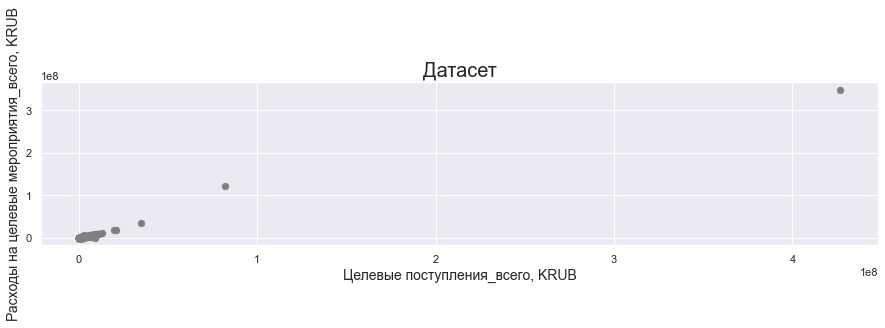

In [39]:
plt.figure(figsize=(15, 3))
plt.scatter(df.loc[:, "Целевые поступления_всего, KRUB"], df.loc[:,
            "Расходы на целевые мероприятия_всего, KRUB"], s=40, color='grey')
plt.title('Датасет', fontsize=20)
plt.xlabel('Целевые поступления_всего, KRUB', fontsize=14)
plt.ylabel('Расходы на целевые мероприятия_всего, KRUB', fontsize=14)
plt.show()

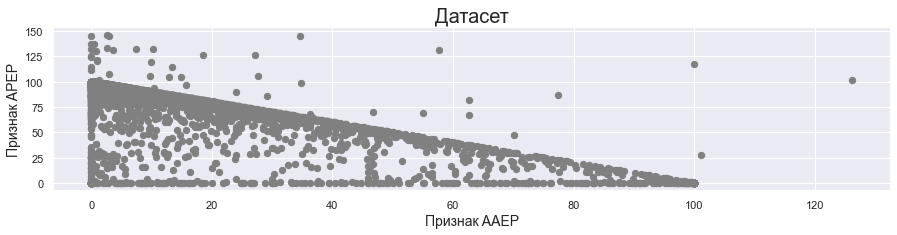

In [40]:
plt.figure(figsize = (15, 3))
plt.scatter(df.loc[:, "AAEP"], df.loc[:, "APEP"], s = 40, color = 'grey')
plt.title('Датасет', fontsize = 20)
plt.xlabel('Признак AAEP', fontsize = 14)
plt.ylabel('Признак APEP', fontsize = 14)
plt.show()

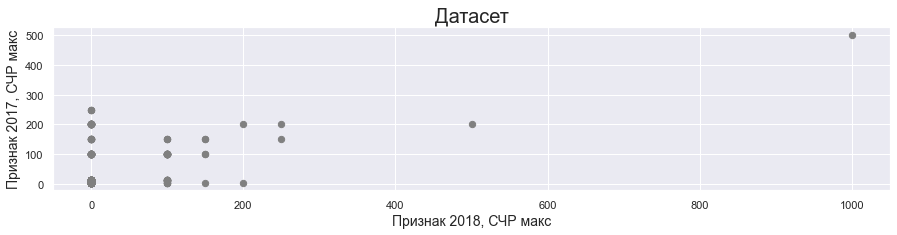

In [41]:
plt.figure(figsize = (15, 3))
plt.scatter(df.loc[:, "2018, СЧР макс"], df.loc[:, "2017, СЧР_пред макс"], s = 40, color = 'grey')
plt.title('Датасет', fontsize = 20)
plt.xlabel('Признак 2018, СЧР макс', fontsize = 14)
plt.ylabel('Признак 2017, СЧР макс', fontsize = 14)
plt.show()

### K-means

In [42]:
df.drop("2017, СЧР_предсказанная", axis=1, inplace=True)

In [43]:
# стандартизируем признаки
from sklearn.preprocessing import StandardScaler
 
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
 
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
 
df_scaled.round(2).head()

,"2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB","2021, Проценты к получению, KRUB","2017, Проценты к уплате, KRUB","2018, Проценты к уплате, KRUB","2019, Проценты к уплате, KRUB","2020, Проценты к уплате, KRUB","2021, Проценты к уплате, KRUB","2017, Прочие доходы, KRUB","2018, Прочие доходы, KRUB","2019, Прочие доходы, KRUB","2020, Прочие доходы, KRUB","2021, Прочие доходы, KRUB","2017, Прочие расходы, KRUB","2018, Прочие расходы, KRUB","2019, Прочие расходы, KRUB","2020, Прочие расходы, KRUB","2021, Прочие расходы, KRUB","2017, Прибыль (убыток) до налогообложения , KRUB","2018, Прибыль (убыток) до налогообложения , KRUB","2019, Прибыль (убыток) до налогообложения , KRUB","2020, Прибыль (убыток) до налогообложения , KRUB","2021, Прибыль (убыток) до налогообложения , KRUB","2017, Текущий налог на прибыль, KRUB","2018, Текущий налог на прибыль, KRUB","2019, Текущий налог на прибыль, KRUB","2020, Текущий налог на прибыль, KRUB","2021, Текущий налог на прибыль, KRUB","2017, Чистая прибыль (убыток), KRUB","2018, Чистая прибыль (убыток), KRUB","2019, Чистая прибыль (убыток), KRUB","2020, Чистая прибыль (убыток), KRUB","2021, Чистая прибыль (убыток), KRUB","2017, Прибыль от приносящей доход деятельности, KRUB","2018, Прибыль от приносящей доход деятельности, KRUB","2019, Прибыль от приносящей доход деятельности, KRUB","2020, Прибыль от приносящей доход деят

In [44]:
# оставим все признаки и для наглядности поместим наши данные в переменную Х
# целевой переменной у нас разумеется нет
X = df_scaled

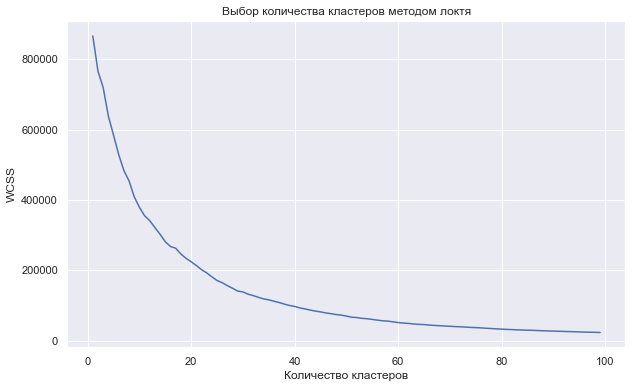

In [45]:
from sklearn.cluster import KMeans
 
# создадим пустой список для записи показателя WCSS (нашей ошибки)
wcss = []
 
for i in range(1, 100):
    
    # настроим параметры модели 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
 
    # обучим модель на наших данных с разным количеством кластеров
    kmeans.fit(X)
 
    # для каждого кластера рассчитаем ошибку (атрибут inertia_) и поместим в список
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (10,6))
plt.plot(range(1, 100), wcss)
plt.title('Выбор количества кластеров методом локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS');

На 60 кластерах ошибка уже незначительно уменьшается

In [46]:
# заново обучим модель с 30 кластерами
kmeans = KMeans(n_clusters = 30, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
# обучение и прогноз в данном случае можно сделать одним методом .fit_predict()
y_pred = kmeans.fit_predict(X)

unique, counts = np.unique(kmeans.labels_, return_counts=True)
dict_val = dict(zip(unique, counts))
dict_val

{0: 3128,
 1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 9: 1,
 10: 2,
 11: 1,
 12: 1,
 13: 28,
 14: 1,
 15: 2580,
 16: 1,
 17: 1,
 18: 1,
 19: 1,
 20: 1,
 21: 1,
 22: 1,
 23: 78,
 24: 1,
 25: 1,
 26: 1,
 27: 1,
 28: 1,
 29: 12}

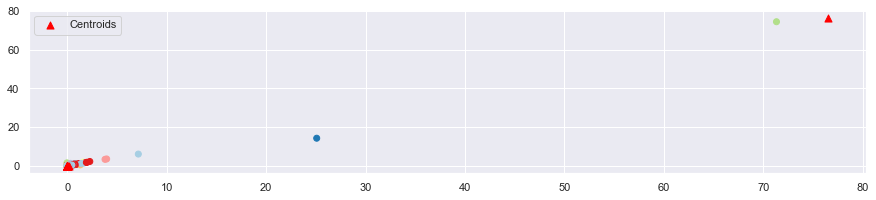

In [47]:
plt.figure(figsize = (15,3))
 
# на целевых расходах и целевых поступлениях
plt.scatter(X.iloc[:,-1], X.iloc[:,-2], c = y_pred, cmap='Paired')
 
# выведем центроиды с помощью атрибута cluster_centers_
# зададим размер s = 50, красный цвет c = 'red', тип маркера - треугольник, и подпись
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 50, c = 'red', marker = '^', label = 'Centroids')
 
plt.legend(loc = 'upper left');

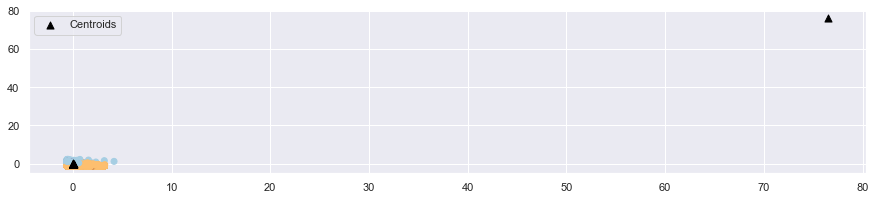

In [48]:
plt.figure(figsize = (15,3))
 
# на APEP и AAEP
plt.scatter(X.iloc[:,-3], X.iloc[:,-4], c = y_pred, cmap='Paired')
 
#выведем центроиды с помощью атрибута cluster_centers_
# зададим размер s = 50, красный цвет c = 'black', тип маркера - треугольник, и подпись
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 50, c = 'black', marker = '^', label = 'Centroids')
 
plt.legend(loc = 'upper left');

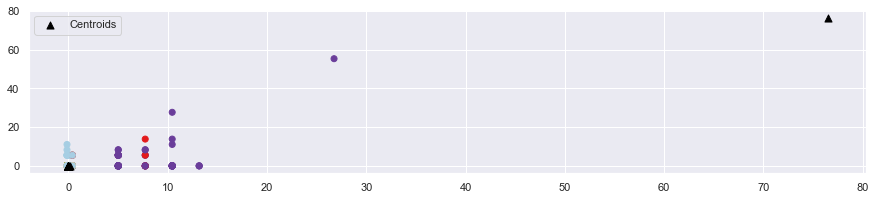

In [49]:
plt.figure(figsize = (15,3))
 
# 2017, СЧР_пред макс и 2018, СЧР макс
plt.scatter(X.iloc[:,-11], X.iloc[:,-10], c = y_pred, cmap='Paired')
 
# выведем центроиды с помощью атрибута cluster_centers_
# зададим размер s = 50, красный цвет c = 'black', тип маркера - треугольник, и подпись
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 50, c = 'black', marker = '^', label = 'Centroids')
 
plt.legend(loc = 'upper left');

### DBSCAN

In [50]:
from sklearn.cluster import DBSCAN

dbscan_2var_0 = DBSCAN()
dbscan_2var_0.fit(df.loc[:, "2017, СЧР_пред макс"].values.reshape(-1, 1),
                  df.loc[:, "2018, СЧР макс"].values.reshape(-1, 1))

print(np.unique(dbscan_2var_0.labels_))
unique, counts = np.unique(dbscan_2var_0.labels_, return_counts=True)
dict(zip(unique, counts))

[-1  0  1  2  3  4  5]


{-1: 4, 0: 5525, 1: 127, 2: 23, 3: 45, 4: 14, 5: 114}

In [51]:
#from sklearn.cluster import DBSCAN

dbscan_2var_1 = DBSCAN()
dbscan_2var_1.fit(df.loc[:, "AAEP"].values.reshape(-1, 1),
                  df.loc[:, "APEP"].values.reshape(-1, 1))

print(np.unique(dbscan_2var_1.labels_))
unique, counts = np.unique(dbscan_2var_1.labels_, return_counts=True)
dict(zip(unique, counts))

[-1  0  1  2  3  4  5  6  7  8  9 10 11]


{-1: 15,
 0: 5307,
 1: 299,
 2: 17,
 3: 22,
 4: 28,
 5: 84,
 6: 30,
 7: 17,
 8: 5,
 9: 15,
 10: 8,
 11: 5}

In [52]:
dbscan_all = DBSCAN()
dbscan_all.fit(df)

print(np.unique(dbscan_all.labels_))
unique, counts = np.unique(dbscan_all.labels_, return_counts=True)
dict(zip(unique, counts))

[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


{-1: 5623,
 0: 9,
 1: 16,
 2: 13,
 3: 6,
 4: 7,
 5: 27,
 6: 22,
 7: 16,
 8: 20,
 9: 6,
 10: 5,
 11: 13,
 12: 10,
 13: 11,
 14: 14,
 15: 11,
 16: 5,
 17: 5,
 18: 5,
 19: 8}

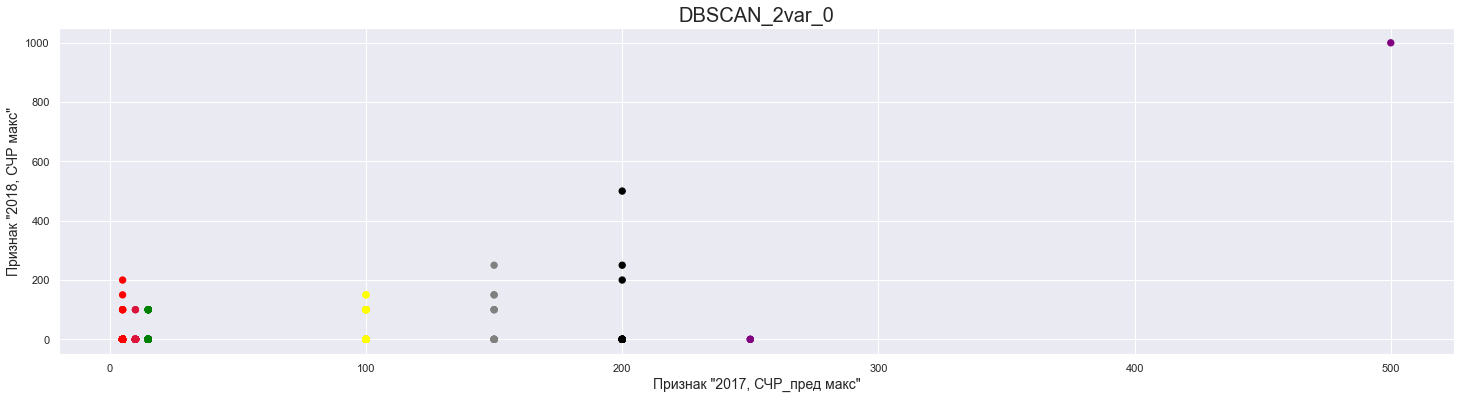

In [53]:
import matplotlib
from matplotlib.colors import ListedColormap
colors = ['purple', 'red', 'blue', 'green', 'orange',
          'black', 'brown', 'yellow', 'pink', 'gray', 'crimson']
df['DBSCAN_labels_2var_0'] = dbscan_2var_0.labels_

# Отобразим точки на графике
plt.figure(figsize=(25, 6))
plt.scatter(df.loc[:, "2017, СЧР_пред макс"], df.loc[:, "2018, СЧР макс"],
            c=df['DBSCAN_labels_2var_0'], cmap=matplotlib.colors.ListedColormap(colors), s=40)
plt.title('DBSCAN_2var_0', fontsize=20)
plt.xlabel('Признак "2017, СЧР_пред макс"', fontsize=14)
plt.ylabel('Признак "2018, СЧР макс"', fontsize=14)
plt.show()

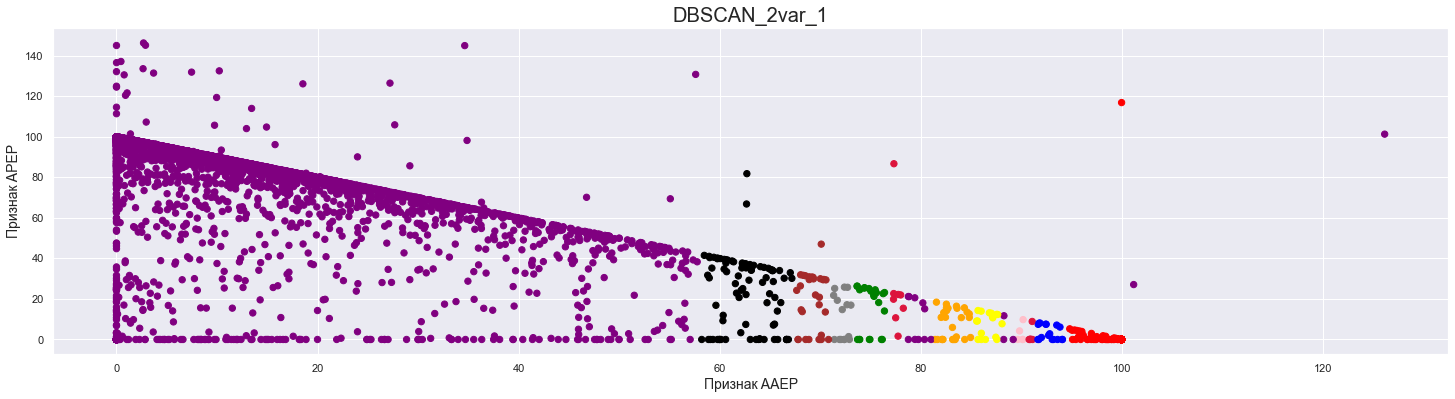

In [54]:
# import matplotlib
# from matplotlib.colors import ListedColormap
colors = ['purple', 'red', 'blue', 'green', 'orange',
          'black', 'brown', 'yellow', 'pink', 'gray', 'crimson']
df['DBSCAN_labels_2var_1'] = dbscan_2var_1.labels_

# Отобразим точки на графике
plt.figure(figsize=(25, 6))
plt.scatter(df.loc[:, "AAEP"], df.loc[:, "APEP"], c=df['DBSCAN_labels_2var_1'],
            cmap=matplotlib.colors.ListedColormap(colors), s=40)
plt.title('DBSCAN_2var_1', fontsize=20)
plt.xlabel('Признак AAEP', fontsize=14)
plt.ylabel('Признак APEP', fontsize=14)
plt.show()

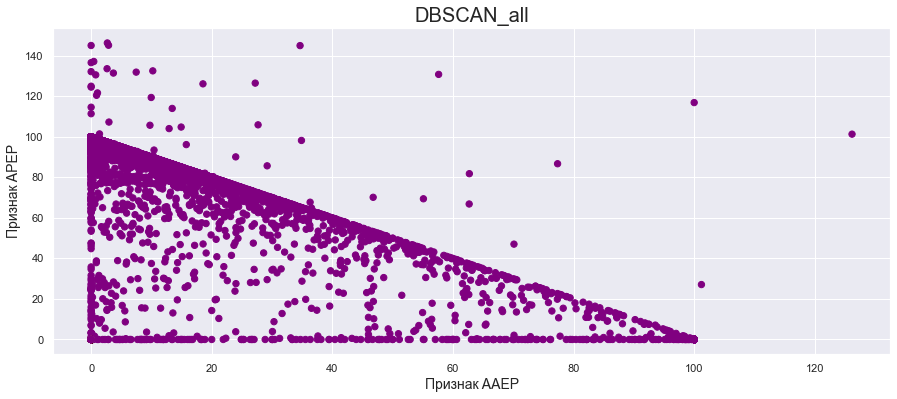

In [55]:
df['DBSCAN_labels_all'] = dbscan_all.labels_

# Отобразим точки на графике
plt.figure(figsize=(15, 6))
plt.scatter(df.loc[:, "AAEP"], df.loc[:, "APEP"], c=df['DBSCAN_labels_all'],
            cmap=matplotlib.colors.ListedColormap(colors), s=40)
plt.title('DBSCAN_all', fontsize=20)
plt.xlabel('Признак AAEP', fontsize=14)
plt.ylabel('Признак APEP', fontsize=14)
plt.show()

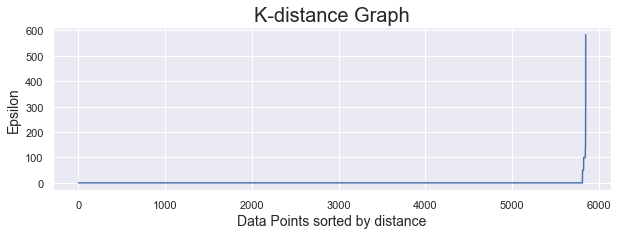

In [56]:
neigh = NearestNeighbors(n_neighbors = 2)
nbrs = neigh.fit(df.loc[:,["2017, СЧР макс", "2018, СЧР макс"]])
distances, indices = nbrs.kneighbors(df.loc[:,["2017, СЧР_пред макс", "2018, СЧР макс"]])

# Отобразим график расстояний между точками
distances = np.sort(distances, axis = 0)
distances = distances[:, 1]
plt.figure(figsize = (10, 3))
plt.plot(distances)
plt.title('K-distance Graph', fontsize = 20)
plt.xlabel('Data Points sorted by distance', fontsize = 14)
plt.ylabel('Epsilon', fontsize = 14)
plt.show()

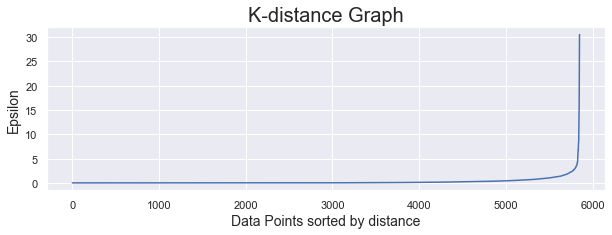

In [57]:
neigh = NearestNeighbors(n_neighbors = 2)
nbrs = neigh.fit(df.loc[:,["AAEP", "APEP"]])
distances, indices = nbrs.kneighbors(df.loc[:,["AAEP", "APEP"]])

# Отобразим график расстояний между точками
distances = np.sort(distances, axis = 0)
distances = distances[:, 1]
plt.figure(figsize = (10, 3))
plt.plot(distances)
plt.title('K-distance Graph', fontsize = 20)
plt.xlabel('Data Points sorted by distance', fontsize = 14)
plt.ylabel('Epsilon', fontsize = 14)
plt.show()

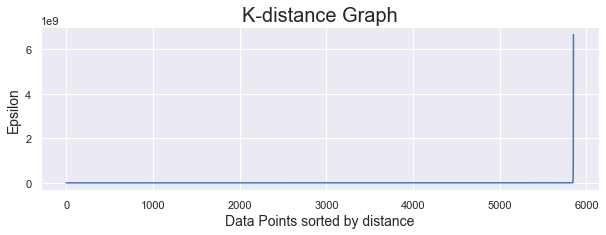

In [58]:
neigh = NearestNeighbors(n_neighbors = 5)
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)

# Отобразим график расстояний между точками
distances = np.sort(distances, axis = 0)
distances = distances[:, 1]
plt.figure(figsize = (10, 3))
plt.plot(distances)
plt.title('K-distance Graph', fontsize = 20)
plt.xlabel('Data Points sorted by distance', fontsize = 14)
plt.ylabel('Epsilon', fontsize = 14)
plt.show()

In [59]:
dbscan_opt_2var_0 = DBSCAN(eps=1, min_samples=15)
dbscan_opt_2var_0.fit(df.loc[:, "2017, СЧР_пред макс"].values.reshape(
    -1, 1), df.loc[:, "2018, СЧР макс"].values.reshape(-1, 1))

print(np.unique(dbscan_opt_2var_0.labels_))
unique, counts = np.unique(dbscan_opt_2var_0.labels_, return_counts=True)
dict(zip(unique, counts))

[-1  0  1  2  3  4]


{-1: 18, 0: 5525, 1: 127, 2: 23, 3: 45, 4: 114}

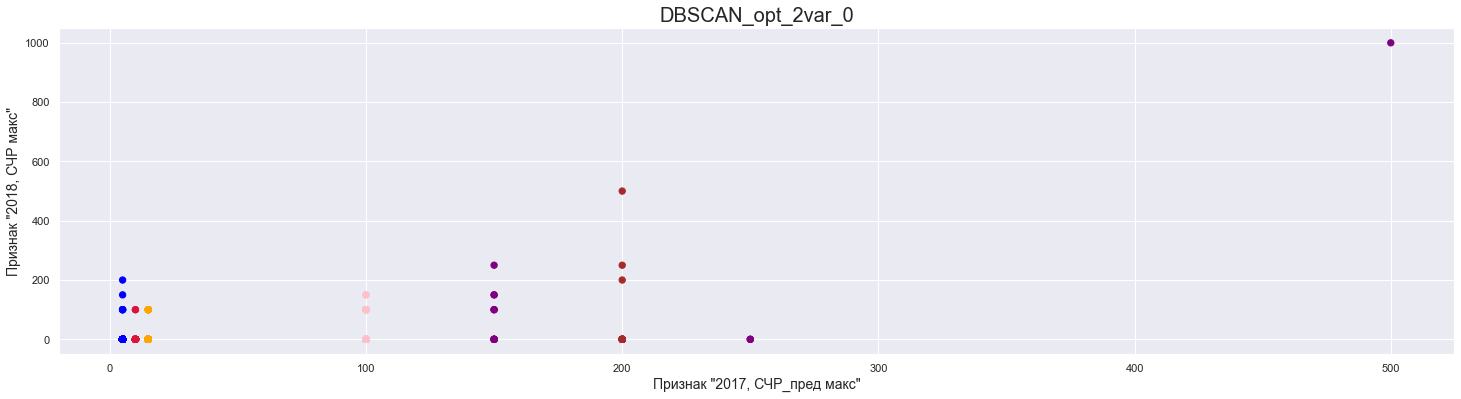

In [60]:
df['DBSCAN_opt_labels_2var_0'] = dbscan_opt_2var_0.labels_
df['DBSCAN_opt_labels_2var_0'].value_counts()
# Обозначим кластеры разными цветами
colors = ['purple', 'red', 'blue', 'green', 'orange', 'black', 'brown', 'yellow', 'pink', 'gray', 'crimson']
#colors = ['purple', 'red', 'blue', 'green', 'orange', 'yellow']
# Отобразим точки на графике
plt.figure(figsize=(25, 6))
plt.scatter(df.loc[:, "2017, СЧР_пред макс"], df.loc[:, "2018, СЧР макс"],
            c=df['DBSCAN_opt_labels_2var_0'], cmap=matplotlib.colors.ListedColormap(colors), s=40)
plt.title('DBSCAN_opt_2var_0', fontsize=20)
plt.xlabel('Признак "2017, СЧР_пред макс"', fontsize=14)
plt.ylabel('Признак "2018, СЧР макс"', fontsize=14)
plt.show()

In [61]:
dbscan_opt_2var_1 = DBSCAN(eps=0.9, min_samples=15)
dbscan_opt_2var_1.fit(df.loc[:, "AAEP"].values.reshape(-1, 1), df.loc[:, "APEP"].values.reshape(-1, 1))

print(np.unique(dbscan_opt_2var_1.labels_))
unique, counts = np.unique(dbscan_opt_2var_1.labels_, return_counts=True)
dict(zip(unique, counts))

[-1  0  1  2  3  4  5  6]


{-1: 104, 0: 5244, 1: 293, 2: 22, 3: 33, 4: 82, 5: 56, 6: 18}

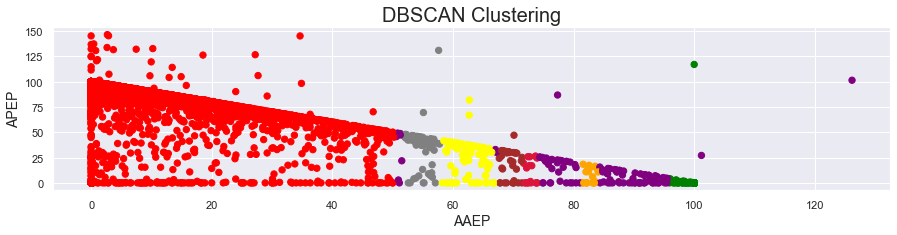

In [62]:
df['DBSCAN_opt_labels_2var_1'] = dbscan_opt_2var_1.labels_
df['DBSCAN_opt_labels_2var_1'].value_counts()
# Обозначим кластеры разными цветами
colors = ['purple', 'red', 'blue', 'green', 'orange', 'black', 'brown', 'yellow', 'pink', 'gray', 'crimson']
#colors = ['purple', 'red', 'blue', 'green', 'orange', 'yellow']
plt.figure(figsize = (15, 3))
plt.scatter(df.loc[:, "AAEP"], df.loc[:, "APEP"], c = df['DBSCAN_opt_labels_2var_1'], cmap = matplotlib.colors.ListedColormap(colors), s = 40)
plt.title('DBSCAN Clustering', fontsize = 20)
plt.xlabel('AAEP',fontsize=14)
plt.ylabel('APEP',fontsize=14)
plt.show()

In [63]:
dbscan_opt_all = DBSCAN(eps=0.9, min_samples=25)
dbscan_opt_all.fit(df)

print(np.unique(dbscan_opt_all.labels_))
unique, counts = np.unique(dbscan_opt_all.labels_, return_counts=True)
dict(zip(unique, counts))

[-1  0]


{-1: 5825, 0: 27}

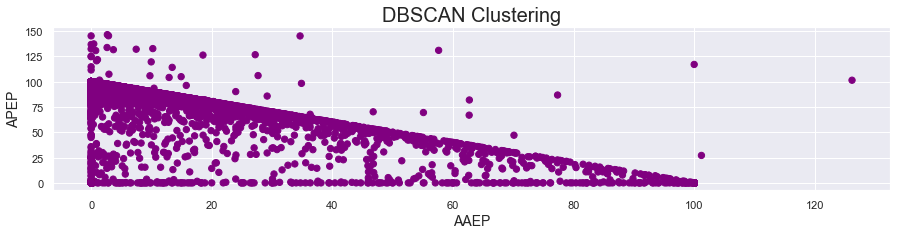

In [64]:
df['DBSCAN_opt_labels_all'] = dbscan_opt_all.labels_
df['DBSCAN_opt_labels_all'].value_counts()
# Обозначим кластеры разными цветами
#colors = ['purple', 'red', 'blue', 'green', 'orange', 'black', 'brown', 'yellow', 'pink']
colors = ['purple', 'red', 'blue', 'green', 'orange', 'yellow']
plt.figure(figsize = (15, 3))
plt.scatter(df.loc[:, "AAEP"], df.loc[:, "APEP"], c = df['DBSCAN_opt_labels_all'], cmap = matplotlib.colors.ListedColormap(colors), s = 40)
plt.title('DBSCAN Clustering', fontsize = 20)
plt.xlabel('AAEP',fontsize=14)
plt.ylabel('APEP',fontsize=14)
plt.show()

***На наш взгляд наилучшее разделение было методом DBSCAN на дефолтных параметрах по 2-м признакам `"2017, СЧР_пред макс"` и `"2018, СЧР макс"`. Это метки `'DBSCAN_labels_2var_0'`***

In [65]:
data.loc[:,"DBSCAN_labels_2var_0"] = df["DBSCAN_labels_2var_0"]
data.loc[:,"DBSCAN_opt_labels_2var_1"] = df["DBSCAN_opt_labels_2var_1"]
data.loc[:,"K_means_labels"] = kmeans.labels_

In [66]:
data["DBSCAN_labels_2var_0"].unique(), data["DBSCAN_opt_labels_2var_1"].unique()

(array([ 0,  1,  2,  3,  4,  5, -1], dtype=int64),
 array([ 0,  1, -1,  2,  4,  3,  5,  6], dtype=int64))

In [67]:
data[data["DBSCAN_labels_2var_0"] == 2]

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB",...,"2018, Проценты к уплате, KRUB","2019, Проценты к уплате, KRUB","2020, Проценты к уплате, KRUB","2021, Проценты к уплате, KRUB","2017, Прочие доходы, KRUB","2018, Прочие доходы, KRUB","2019, Прочие доходы, KRUB","2020, Прочие доходы, KRUB","2021, Прочие доходы, KRUB","2017, Прочие расходы, KRUB","2018, Прочие расходы, KRUB","2019, Прочие расходы, KRUB","2020, Прочие расходы, KRUB","2021, Прочие расходы, KRUB","2017, Прибыль (убыток) до налогообложения , KRUB","2018, Прибыль (убыток) до налогообложения , KRUB","2019, Прибыль (убыток) до налогообложения , KRUB","2020, Прибыль (убыток) до налогообложения , KRUB","2021, Прибыль (убыток) до налогообложения , KRUB","2017, Текущий налог на прибыль, KRUB","2018, Текущий налог на прибыль, KRUB","2019, Текущий налог на прибыль, KRUB","2020, Текущий налог на прибыль, KRUB","2021, Текущий налог на прибыль, KRUB","2017, Чистая прибыль (убыток), KRUB","2018, Чистая прибыль (убыток), KRUB","2019, Чистая прибыль (убыток), KRUB","2020, Чистая прибыль (убыток), KRUB","2021, Чистая прибыль (убыток), 

## Расчет коэффициентов

In [68]:
# (1300+1400)/1700  1400-долгосрочныхзаймов нет у нас

# Коэффициент приближен к 1 показывает  насколько мало привлечено организацией кракосрочных займов. 
# Низкая доля краткосрочных заимствований называется финансовой устойчивостью.
# Показывает степень зависимости организации от внешнего финансирования и помогает спрогнозировать 
# ее платежеспособность в долгосрочной перспективе.  Оптимально 0,8-0,9

for y in range(2017,2022):
    data[f'{y}, Коэф финансовой устойчивости'] = data[f'{y}, Капитал и резервы, KRUB']\
                                                  /(data[f'{y}, Пассивы всего, KRUB']+1)
    

In [69]:
# Показывает долю активов, который покрываются за счет собственного капитала. Чемы выше этот коэффициент, 
# тем лучше финансовое состояние компании. Норм больше 0,5

for y in range(2017,2022):
    data[f'{y}, Коэф финансовой независимости'] = data[f'{y}, Капитал и резервы, KRUB']\
                                                   /(data[f'{y}, Заёмные средства (краткосрочные), KRUB']+1)
    

In [70]:
# Коэффициент текущей ликвидности CA/CL Оценка платежеспособности фонда
# CA – текущие активы (оборотные), CL – текущие обязательства (обязательства перед поставщиками услуг).

for y in range(2017,2022):
    data[f'{y}, Коэф текущей ликвидности'] = (data[f'{y}, Дебиторская задолженность, KRUB']
                                              +  data[f'{y}, Денежные средства и денежные эквиваленты, KRUB'])\
                                              /(data[f'{y}, Кредиторская задолженность, KRUB']+1)

In [71]:
# Соотношение доходов и расходов FCE/FCI
# При значительном превышении расходов над доходами имеет смысл пересмотреть фандрайзинговую политику
# FCI – поступления в валюте, FCE – расходы в валюте

for y in range(2017,2022):
    data[f'{y}, Соотношение всех доходов и расходов'] = data[f'{y}, Всего использовано средств, KRUB']\
                                                        /(data[f'{y}, Всего поступило средств, KRUB']+1)

In [72]:
# Индикатор сбережений (TI-TE)/TE
# Один из индикаторов устойчивого развития фонда (необходимо анализировать в динамике и в зависимости от типа фонда)
# TI – общие поступления, TE – общие расходы,

for y in range(2017,2022):
    data[f'{y}, Индикатор сбережений'] = (data[f'{y}, Всего поступило средств, KRUB'] 
                                          - data[f'{y}, Всего использовано средств, KRUB'])\
                                          /(data[f'{y}, Всего использовано средств, KRUB']+1)

In [73]:
# Динамика расходов TE(t)/TE(t-1) Анализ динамики показателей иллюстрирует основные тенденции. 
for y in range(2017,2021):
    data[f'{y+1}/{y}, Динамика расходов'] = data[f'{y+1}, Всего использовано средств, KRUB']\
                                          /(data[f'{y}, Всего использовано средств, KRUB']+1)

In [74]:
# Динамика доходов TI(t)/TI(t-1) Анализ динамики показателей иллюстрирует основные тенденции. 
for y in range(2017,2021):
    data[f'{y+1}/{y}, Динамика доходов'] = data[f'{y+1}, Всего поступило средств, KRUB']\
                                          /(data[f'{y}, Всего поступило средств, KRUB']+1)

In [75]:
# Посчитаем усредненные значения следующих коэффициентов:

# Соотношение всех доходов и расходов
data["СДохРас_средн"] = data.apply(lambda x: round(sum(
    [x[str(i)+", Соотношение всех доходов и расходов"] for i in range(2017, 2022)])/5, 2), axis=1)

# Коэф финансовой устойчивости
data["К_фин_уст_средн"] = data.apply(lambda x: round(sum(
    [x[str(i)+", Коэф финансовой устойчивости"] for i in range(2017, 2022)])/5, 2), axis=1)

# Коэф финансовой независимости
data["К_фин_незав_средн"] = data.apply(lambda x: round(sum(
    [x[str(i)+", Коэф финансовой независимости"] for i in range(2017, 2022)])/5, 2), axis=1)

# Коэф текущей ликвидности
data["К_тек_ликв_средн"] = data.apply(lambda x: round(sum(
    [x[str(i)+", Коэф текущей ликвидности"] for i in range(2017, 2022)])/5, 2), axis=1)

# Индикатор сбережений
data["Инд_сбереж"] = data.apply(lambda x: round(sum(
    [x[str(i)+", Индикатор сбережений"] for i in range(2017, 2022)])/5, 2), axis=1)

In [76]:
data.describe()

,Регистрационный номер,Код налогоплательщика,Код ОКАТО,Код ОКТМО,Код ОКОПФ,"2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB","2021, Проценты к получению, KRUB","2017, Проценты к уплате, KRUB","2018, Проценты к уплате, KRUB","2019, Проценты к уплате, KRUB","2020, Проценты к уплате, KRUB","2021, Проценты к уплате, KRUB","2017, Прочие доходы, KRUB","2018, Прочие доходы, KRUB",...,"2020, Всего поступило средств, KRUB","2021, Всего поступило средств, KRUB","2017, Расходы на целевые мероприятия, KRUB","2018, Расходы на целевые мероприятия, KRUB","2019, Расходы на целевые мероприятия, KRUB","2020, Расходы на целевые мероприятия, KRUB","2021, Расходы на целевые мероприятия, KRUB","2017, Расходы на содержание аппарата управления, KRUB","2018, Расходы на содержание аппарата управления, KRUB","2019, Расходы на содержание аппарата управления, KRUB","2020, Расходы на содержание аппарата управления, KRUB","2021, Расходы на содержание аппарата управления, KRUB","2017, Приобретение основных средств, инвентаря и иного имущества, KRUB","2018, Приобретение основных средств, инвентаря и иного имущества, KRUB","2019, Приобретение основных средств, инвентаря и иного имущества, KRUB","2020, Приобретение основных средств, инвентаря и иного имущества, KRUB","2021, Приобретение основных средств, инвентаря и иного имущества, KRUB","2017, Всего использовано средств, KRUB","2018, В

In [77]:
data[(data["2017, Коэф финансовой устойчивости"] < 0) & (data["2018, Коэф финансовой устойчивости"] < 0)\
     & (data["2019, Коэф финансовой устойчивости"] < 0) & (data["2020, Коэф финансовой устойчивости"] < 0)\
     & (data["2021, Коэф финансовой устойчивости"] < 0)]["Организационно-правовая форма"].value_counts()

Благотворительные фонды    47
Общественные фонды         14
Фонды                       1
Экологические фонды         1
Name: Организационно-правовая форма, dtype: int64

**Вывод**: 63 компании имеют за все 5 лет отрицательные показатели коэффициента финансовой устойчивости и коэффициента финансовой независимости, т.е. все их имущество сформировано исключительно за счет долгов, и такие компании фактически являются банкротами

### Есть ли связь между материальным благополучием фонда и количеством штатных работников?

***Материальное благополучение фонда***, с нашей точки зрения, будем оценивать, используя следующий набор коэффициентов: `соотношение доходов и расходов`, `коэффициент финансовой устойчивости`, `коэффициент финансовой независимости`, `коэффициент текущей ликвидности`, `индикатор сбережений`

In [78]:
column_2017 = ["2017, СЧР_пред макс", "СДохРас_средн", "К_фин_уст_средн", "К_фин_незав_средн", "К_тек_ликв_средн", "Инд_сбереж"]
column_2017_ = ["2017, СЧР макс", "СДохРас_средн", "К_фин_уст_средн", "К_фин_незав_средн", "К_тек_ликв_средн", "Инд_сбереж"]
column_2018 = ["2018, СЧР макс", "СДохРас_средн", "К_фин_уст_средн", "К_фин_незав_средн", "К_тек_ликв_средн", "Инд_сбереж"]

In [79]:
data[column_2017_].corr().iloc[0]

2017, СЧР макс       1.00
СДохРас_средн       -0.00
К_фин_уст_средн      0.01
К_фин_незав_средн   -0.00
К_тек_ликв_средн    -0.00
Инд_сбереж          -0.00
Name: 2017, СЧР макс, dtype: float64

In [80]:
data[column_2018].corr().iloc[0]

2018, СЧР макс       1.00
СДохРас_средн       -0.00
К_фин_уст_средн      0.00
К_фин_незав_средн   -0.00
К_тек_ликв_средн    -0.00
Инд_сбереж          -0.00
Name: 2018, СЧР макс, dtype: float64

In [81]:
data[column_2017].corr().iloc[0]

2017, СЧР_пред макс   1.00
СДохРас_средн         0.00
К_фин_уст_средн       0.00
К_фин_незав_средн     0.01
К_тек_ликв_средн      0.01
Инд_сбереж            0.01
Name: 2017, СЧР_пред макс, dtype: float64

*Видно, что по изначально представленным данным ввиду их малого наличия установить какую-то зависимость с материальным благополучением фонда невозможно, однако посмотрим что у нас получилось при кластеризации компаний по когортам.*

In [82]:
unique, counts = np.unique(dbscan_2var_0.labels_, return_counts=True)
d = dict(zip(unique, counts))
d

{-1: 4, 0: 5525, 1: 127, 2: 23, 3: 45, 4: 14, 5: 114}

In [83]:
for i in d.keys():
    print(f'Когорта_{i}\n', data[data["DBSCAN_labels_2var_0"] == i][column_2017_].corr().iloc[0])

Когорта_-1
 2017, СЧР макс       1.00
СДохРас_средн       -0.04
К_фин_уст_средн     -0.94
К_фин_незав_средн   -0.35
К_тек_ликв_средн    -0.14
Инд_сбереж          -0.90
Name: 2017, СЧР макс, dtype: float64
Когорта_0
 2017, СЧР макс       1.00
СДохРас_средн       -0.01
К_фин_уст_средн      0.03
К_фин_незав_средн    0.01
К_тек_ликв_средн    -0.01
Инд_сбереж          -0.00
Name: 2017, СЧР макс, dtype: float64
Когорта_1
 2017, СЧР макс       1.00
СДохРас_средн       -0.14
К_фин_уст_средн      0.13
К_фин_незав_средн   -0.18
К_тек_ликв_средн    -0.19
Инд_сбереж          -0.18
Name: 2017, СЧР макс, dtype: float64
Когорта_2
 2017, СЧР макс       1.00
СДохРас_средн       -0.09
К_фин_уст_средн      0.14
К_фин_незав_средн   -0.10
К_тек_ликв_средн    -0.16
Инд_сбереж           0.11
Name: 2017, СЧР макс, dtype: float64
Когорта_3
 2017, СЧР макс       1.00
СДохРас_средн        0.46
К_фин_уст_средн      0.53
К_фин_незав_средн    0.11
К_тек_ликв_средн     0.16
Инд_сбереж          -0.22
Name: 2017, СЧР 

In [84]:
data[data["DBSCAN_labels_2var_0"] == -1]

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB",...,"2021, Всего поступило средств, KRUB","2017, Расходы на целевые мероприятия, KRUB","2018, Расходы на целевые мероприятия, KRUB","2019, Расходы на целевые мероприятия, KRUB","2020, Расходы на целевые мероприятия, KRUB","2021, Расходы на целевые мероприятия, KRUB","2017, Расходы на содержание аппарата управления, KRUB","2018, Расходы на содержание аппарата управления, KRUB","2019, Расходы на содержание аппарата управления, KRUB","2020, Расходы на содержание аппарата управления, KRUB","2021, Расходы на содержание аппарата управления, KRUB","2017, Приобретение основных средств, инвентаря и иного имущества, KRUB","2018, Приобретение основных средств, инвентаря и иного имущества, KRUB","2019, Приобретение основных средств, инвентаря и иного имущества, KRUB","2020, Приобретение основных средств, инвентаря и иного имущества, KRUB","2021, Приобретение основных средств, инвентаря и иного имущества, KRUB","2017, Всего использовано средств, KRUB","2018, Всего использовано средств, KRUB","2019, Всего использовано средств, KRUB","2020, Всего исп

*Однако, если рассматривать взаимосвязь численности сотрудников с материальным благополучием фонда в разрезе когорт, то наблюдаем, что с увеличением численности сотрудников в компании увеличивается эта зависимость при чем по всем коэффициентам, но во всех когортах преобладает положительная зависимость численности с коэффциентов финансовой устойчивости компании. Пик зависимости численности сотрудников от материального благосостояния фонда приходится на 6 когорту, в которую вошли компании с численностью сотрудников от 51 до 100 в 2017 году (когорта № 3). Для компаний с численностью меньше или уже больше взаимосвязь снижается. При этом для компаний с численностью сотрудников от 201-250 и 251-500 (когорта №-1) связь среднесписочной численности с материальным благополучеим фонда становится сильно отрицательной*

***Вывод:*** Есть ли связь между материальным благополучием фонда и количеством штатных работников? Нашим ответом будет, что такая связь есть и она усиливается с увеличением численности сотрудников в компании, особенно характерна для средних компаний с численностью сотрудников от 51 до 100 человек (связь положительная) и для крупных компания с численностью сотрудников от 201-250 и 251-500 (связь сильно отрицательная) при чем по всем показателям материального благополучия, с ростом же численности от 101 до 200 эта зависимость несколько снижается, становясь отрицательной.

### Определить факторы, влияющие на закредитованность, финансовое благополучие организации

In [85]:
data["Заёмные средства_средн"] = data.apply(lambda x: round(sum(
    [x[str(i)+", Заёмные средства (краткосрочные), KRUB"] for i in range(2017, 2022)])/5, 2), axis=1)

**Посмотрим по всем имеющимся компаниям в каких годах было взято больше всего краткосрочных займов**

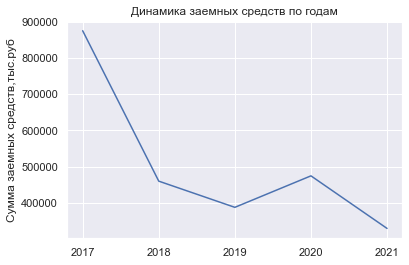

In [86]:
col = [f'{i}, Заёмные средства (краткосрочные), KRUB' for i in range(2017, 2022)]
tab = pd.DataFrame(data[col].sum())
tab.index = [col[i].split(",")[0] for i in range(5)]
plt.plot(tab.index, tab[0])
plt.title('Динамика заемных средств по годам')
plt.ylabel('Сумма заемных средств,тыс.руб');

In [87]:
data[data["2017, Заёмные средства (краткосрочные), KRUB"] == data["2017, Заёмные средства (краткосрочные), KRUB"].max()]

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB",...,"2017, Расходы на целевые мероприятия, KRUB","2018, Расходы на целевые мероприятия, KRUB","2019, Расходы на целевые мероприятия, KRUB","2020, Расходы на целевые мероприятия, KRUB","2021, Расходы на целевые мероприятия, KRUB","2017, Расходы на содержание аппарата управления, KRUB","2018, Расходы на содержание аппарата управления, KRUB","2019, Расходы на содержание аппарата управления, KRUB","2020, Расходы на содержание аппарата управления, KRUB","2021, Расходы на содержание аппарата управления, KRUB","2017, Приобретение основных средств, инвентаря и иного имущества, KRUB","2018, Приобретение основных средств, инвентаря и иного имущества, KRUB","2019, Приобретение основных средств, инвентаря и иного имущества, KRUB","2020, Приобретение основных средств, инвентаря и иного имущества, KRUB","2021, Приобретение основных средств, инвентаря и иного имущества, KRUB","2017, Всего использовано средств, KRUB","2018, Всего использовано средств, KRUB","2019, Всего использовано средств, KRUB","2020, Всего использовано средств, KRUB","2021, Всего 

In [88]:
data.sort_values('2017, Заёмные средства (краткосрочные), KRUB', ascending=False)[
    "2017, Заёмные средства (краткосрочные), KRUB"][:10]

1598   451560.00
368     74448.00
521     54311.00
5975    47130.00
2461    33645.00
1417    32040.00
297     23703.00
513     18538.00
964     17241.00
81      12631.00
Name: 2017, Заёмные средства (краткосрочные), KRUB, dtype: float64

In [89]:
data.sort_values('2021, Заёмные средства (краткосрочные), KRUB', ascending=False)[
    "2021, Заёмные средства (краткосрочные), KRUB"][:10]

368    74426.00
1417   52144.00
2461   22858.00
513    21099.00
1598   17429.00
1208   12501.00
4837    6866.00
2842    6420.00
1284    6128.00
51      5890.00
Name: 2021, Заёмные средства (краткосрочные), KRUB, dtype: float64

*Большие суммы займов взяты в 2017 году, и наибольший вклад сюда внес фонд Черномырдина, размер краткосрочного займа которого в этом году составил 451560 тыс.рублей. Исключим из рассмотрения этот фонд, считая его выбросом в значениях для всех остальных. По остальным годам таких выбросов в значениях нет*

In [90]:
data.drop([1598], inplace=True)

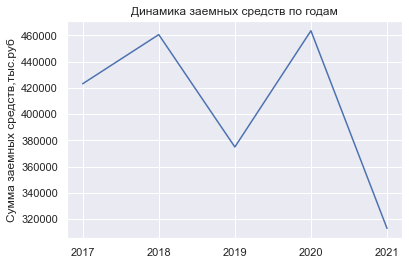

In [91]:
col = [f'{i}, Заёмные средства (краткосрочные), KRUB' for i in range(2017, 2022)]
tab = pd.DataFrame(data[col].sum())
tab.index = [col[i].split(",")[0] for i in range(5)]
plt.plot(tab.index, tab[0])
plt.title('Динамика заемных средств по годам')
plt.ylabel('Сумма заемных средств,тыс.руб');

**Больше всего займов взято в 2018 и 2020 годах**

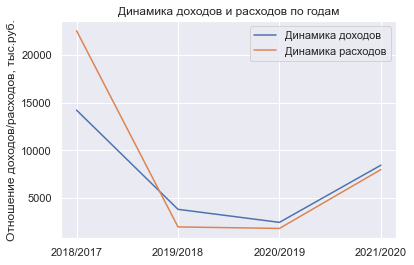

In [92]:
col1 = [f'{i}, Динамика доходов' for i in [
    '2018/2017', '2019/2018', '2020/2019', '2021/2020']]
col2 = [f'{i}, Динамика расходов' for i in [
    '2018/2017', '2019/2018', '2020/2019', '2021/2020']]
data1 = pd.DataFrame(data[col1].mean(), columns=['Динамика доходов']).reindex(
    [col1[i].split(",")[0] for i in range(4)], method='bfill')
data2 = pd.DataFrame(data[col2].mean(), columns=['Динамика расходов']).reindex(
    [col2[i].split(",")[0] for i in range(4)], method='bfill')
data3 = data1.join(data2, how='inner')

for k in data3.columns:
    plt.plot(data3.index, data3[k])
    plt.title('Динамика доходов и расходов по годам')
    plt.ylabel('Отношение доходов/расходов, тыс.руб.')
    plt.legend(data3)

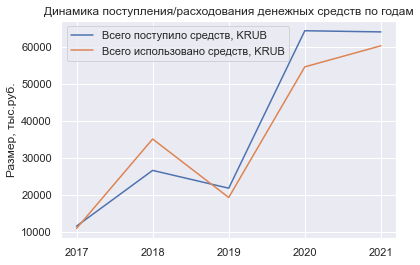

In [93]:
col1 = [f'{i}, Всего поступило средств, KRUB' for i in range(2017,2022)]
col2 = [f'{i}, Всего использовано средств, KRUB' for i in range(2017,2022)]

data1 = pd.DataFrame(data[col1].mean(), columns=['Всего поступило средств, KRUB']).reindex(
    [col1[i].split(",")[0] for i in range(5)], method='bfill')
data2 = pd.DataFrame(data[col2].mean(), columns=['Всего использовано средств, KRUB']).reindex(
    [col2[i].split(",")[0] for i in range(5)], method='bfill')
data3 = data1.join(data2, how='inner')

for k in data3.columns:
    plt.plot(data3.index, data3[k])
    plt.title('Динамика поступления/расходования денежных средств по годам')
    plt.ylabel('Размер, тыс.руб.')
    plt.legend(data3)

**Вывод:** Получение краткосрочных займов в 2018 г. как видно из графиков связано в первую очередь с превышение расходования денежных средств над их поступлением. Про 2020 г. такого сказать нельзя, т.к. поступления превышают суммы расхода.

In [94]:
col_2017 = [j for j in data.columns if '2017' in j]
col_2018 = [j for j in data.columns if '2018' in j]
col_2019 = [j for j in data.columns if '2019' in j]
col_2020 = [j for j in data.columns if '2020' in j]
col_2021 = [j for j in data.columns if '2021' in j]

Посмотрим на корреляцию краткосрочных заемных средств, полученных в 2018 и 2020 годах с другими показателями компаний по методу Пирсона и Спирмена и отберем показатели, наиболее сильно связанные с заемными средствами

In [95]:
df_2018_sp = sorted(zip(data[org_col+col_2017+col_2018].columns, data[org_col+col_2017 +
                 col_2018].corrwith(data["2018, Заёмные средства (краткосрочные), KRUB"], method='spearman')), key=lambda x: -x[1])

df_2018_pe = sorted(zip(data[org_col+col_2017+col_2018].columns, data[org_col+col_2017 +
                 col_2018].corrwith(data["2018, Заёмные средства (краткосрочные), KRUB"])), key=lambda x: -x[1])

# показатели наиболее скоррелированные с заемными средствами в 2018
col_sp, value =zip(*df_2018_sp)
col_sp = set(list(col_sp[:10]))
col_pe, value =zip(*df_2018_pe)
col_pe = set(list(col_pe[:10]))
col = list(col_sp.union(col_pe))

df_2020_sp = sorted(zip(data[org_col+col_2017+col_2018+col_2019+col_2020].columns, data[org_col+col_2017 +
                 col_2018+col_2019+col_2020].corrwith(data["2020, Заёмные средства (краткосрочные), KRUB"], method='spearman')), key=lambda x: -x[1])

df_2020_pe = sorted(zip(data[org_col+col_2017+col_2018+col_2019+col_2020].columns, data[org_col+col_2017 +
                 col_2018+col_2019+col_2020].corrwith(data["2020, Заёмные средства (краткосрочные), KRUB"])), key=lambda x: -x[1])

# показатели наиболее скоррелированные с заемными средствами в 2020
col_sp2, value =zip(*df_2020_sp)
col_sp2 = set(list(col_sp2[:10]))
col_pe2, value =zip(*df_2020_pe)
col_pe2 = set(list(col_pe2[:10]))
col2 = list(col_sp2.union(col_pe2))
col = sorted(list(set(col).union(set(col2))))

col, len(col)

C:\Users\Ludmila\AppData\Roaming\Python\Python38\site-packages\scipy\stats\stats.py:4196: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


(['2017, Всего поступило средств, KRUB',
  '2017, Индикатор сбережений',
  '2017, Коммерческие расходы, KRUB',
  '2017, Коэф финансовой независимости',
  '2017, Пассивы всего, KRUB',
  '2017, Прибыль (убыток) от продажи, KRUB',
  '2017, Приобретение основных средств, инвентаря и иного имущества, KRUB',
  '2017, Расходы на целевые мероприятия, KRUB',
  '2017, Среднесписочная численность работников',
  '2018, Коммерческие расходы, KRUB',
  '2018, Коэф текущей ликвидности',
  '2018, Прибыль (убыток) до налогообложения , KRUB',
  '2018, Себестоимость продаж, KRUB',
  '2018/2017, Динамика доходов',
  '2018/2017, Динамика расходов',
  '2019, Коэф текущей ликвидности',
  '2019, Прибыль от приносящей доход деятельности, KRUB',
  '2019, Прочие доходы, KRUB',
  '2019, Себестоимость продаж, KRUB',
  '2019/2018, Динамика расходов',
  '2020, Себестоимость продаж, KRUB',
  '2020/2019, Динамика расходов',
  'Год_регистрации',
  'Дата регистрации',
  'Организационно-правовая форма'],
 25)

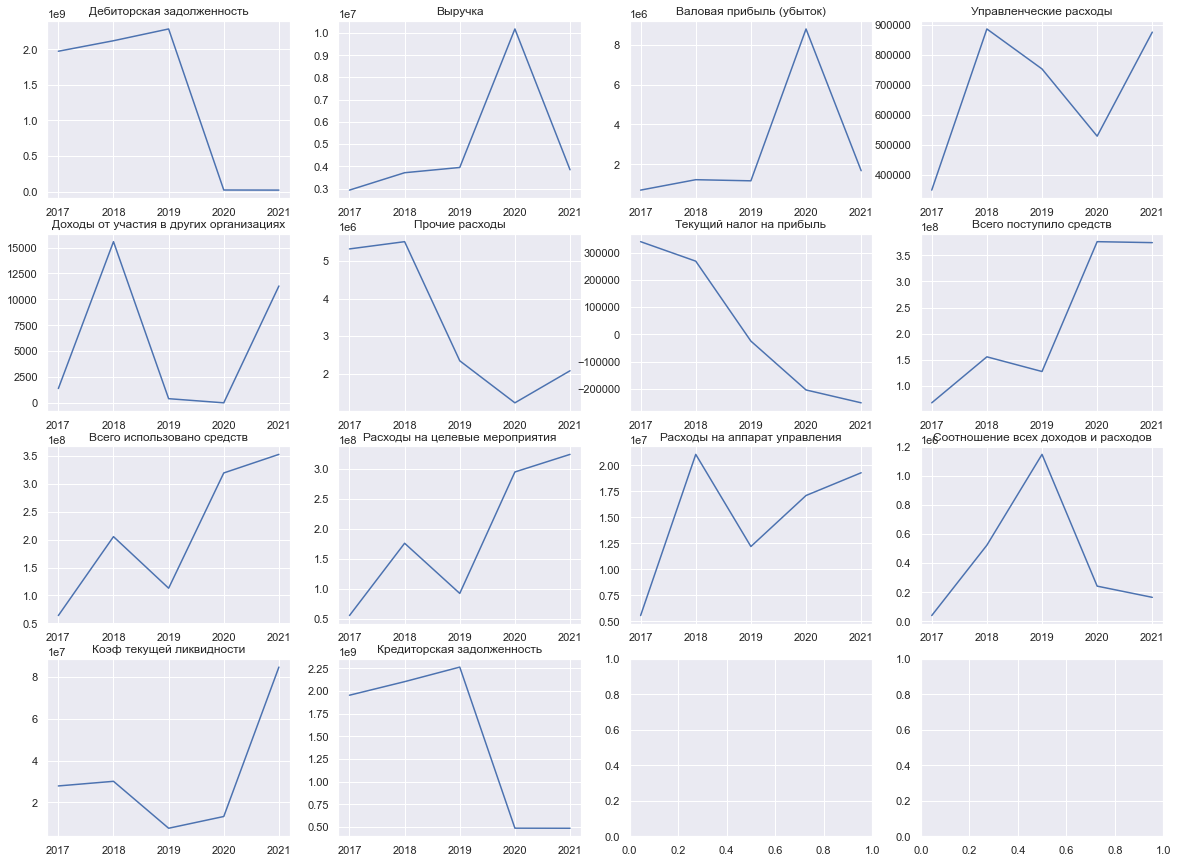

In [96]:
data1 = pd.DataFrame(data[[f'{i}, Дебиторская задолженность, KRUB' for i in range(2017, 2022)]].sum(),
                     columns=['Дебиторская задолженность, KRUB']).\
                    reindex(['2017', '2018', '2019', '2020', '2021'], method='bfill')
data2 = pd.DataFrame(data[[f'{i}, Выручка, KRUB' for i in range(2017, 2022)]].sum(),
                     columns=['Выручка, KRUB']).\
                    reindex(['2017', '2018', '2019', '2020', '2021'], method='bfill')
data3 = pd.DataFrame(data[[f'{i}, Валовая прибыль (убыток), KRUB' for i in range(2017, 2022)]].sum(),
                     columns=['Валовая прибыль (убыток), KRUB']).\
                    reindex(['2017', '2018', '2019', '2020', '2021'], method='bfill')
data4 = pd.DataFrame(data[[f'{i}, Управленческие расходы, KRUB' for i in range(2017, 2022)]].sum(),
                     columns=['Управленческие расходы, KRUB']).\
                    reindex(['2017', '2018', '2019', '2020', '2021'], method='bfill')
data5 = pd.DataFrame(data[[f'{i}, Доходы от участия в других организациях, KRUB' for i in range(2017, 2022)]].sum(),
                     columns=['Доходы от участия в других организациях, KRUB']).\
                    reindex(['2017', '2018', '2019', '2020', '2021'], method='bfill')
data6 = pd.DataFrame(data[[f'{i}, Прочие расходы, KRUB' for i in range(2017, 2022)]].sum(),
                     columns=['Прочие расходы, KRUB']).\
                    reindex(['2017', '2018', '2019', '2020', '2021'], method='bfill')
data7 = pd.DataFrame(data[[f'{i}, Текущий налог на прибыль, KRUB' for i in range(2017, 2022)]].sum(),
                     columns=['Текущий налог на прибыль, KRUB']).\
                    reindex(['2017', '2018', '2019', '2020', '2021'], method='bfill')
data8 = pd.DataFrame(data[[f'{i}, Всего поступило средств, KRUB' for i in range(2017, 2022)]].sum(),
                     columns=['Всего поступило средств, KRUB']).\
                    reindex(['2017', '2018', '2019', '2020', '2021'], method='bfill')
data9 = pd.DataFrame(data[[f'{i}, Всего использовано средств, KRUB' for i in range(2017, 2022)]].sum(),
                     columns=['Всего использовано средств, KRUB']).\
                    reindex(['2017', '2018', '2019', '2020', '2021'], method='bfill')
data10 = pd.DataFrame(data[[f'{i}, Расходы на целевые мероприятия, KRUB' for i in range(2017, 2022)]].sum(),
                     columns=['Расходы на целевые мероприятия, KRUB']).\
                    reindex(['2017', '2018', '2019', '2020', '2021'], method='bfill')
data11 = pd.DataFrame(data[[f'{i}, Расходы на содержание аппарата управления, KRUB' for i in range(2017, 2022)]].sum(),
                     columns=['Расходы на содержание аппарата управления, KRUB']).\
                    reindex(['2017', '2018', '2019', '2020', '2021'], method='bfill')
data12 = pd.DataFrame(data[[f'{i}, Соотношение всех доходов и расходов' for i in range(2017, 2022)]].sum(),
                     columns=['Соотношение всех доходов и расходов']).\
                    reindex(['2017', '2018', '2019', '2020', '2021'], method='bfill')
data13 = pd.DataFrame(data[[f'{i}, Коэф текущей ликвидности' for i in range(2017, 2022)]].sum(),
                     columns=['Коэф текущей ликвидности']).\
                    reindex(['2017', '2018', '2019', '2020', '2021'], method='bfill')
data14 = pd.DataFrame(data[[f'{i}, Кредиторская задолженность, KRUB' for i in range(2017, 2022)]].sum(),
                     columns=['Кредиторская задолженность, KRUB']).\
                    reindex(['2017', '2018', '2019', '2020', '2021'], method='bfill')

fig, axes = plt.subplots(4, 4, figsize = (20,15))
axes[0][0].plot(data1.index, data1)
axes[0][0].set_title('Дебиторская задолженность')

axes[0][1].plot(data2.index, data2)
axes[0][1].set_title('Выручка')

axes[0][2].plot(data3.index, data3)
axes[0][2].set_title('Валовая прибыль (убыток)')

axes[0][3].plot(data4.index, data4)
axes[0][3].set_title('Управленческие расходы')

axes[1][0].plot(data5.index, data5)
axes[1][0].set_title('Доходы от участия в других организациях')

axes[1][1].plot(data6.index, data6)
axes[1][1].set_title('Прочие расходы')

axes[1][2].plot(data7.index, data7)
axes[1][2].set_title('Текущий налог на прибыль')

axes[1][3].plot(data8.index, data8)
axes[1][3].set_title('Всего поступило средств')

axes[2][0].plot(data9.index, data9)
axes[2][0].set_title('Всего использовано средств')

axes[2][1].plot(data10.index, data10)
axes[2][1].set_title('Расходы на целевые мероприятия')

axes[2][2].plot(data11.index, data11)
axes[2][2].set_title('Расходы на аппарат управления')

axes[2][3].plot(data12.index, data12)
axes[2][3].set_title('Соотношение всех доходов и расходов')

axes[3][0].plot(data13.index, data13)
axes[3][0].set_title('Коэф текущей ликвидности')

axes[3][1].plot(data14.index, data14)
axes[3][1].set_title('Кредиторская задолженность');

**Вывод:** Большая дебиторская задолженность, платежи по налогу на прибыль, низкая выручка от других видов деятельности на фоне больших управленческих расходов, превышающие расходы на целевые мероприятия при низком поступлении денежных средств явилось причиной в необходимости получения займов, чтобы покрыть собственные расходы фонда на свое обеспечение. Что подтверждает сделанный ранее вывод о превышение расходов денежных средств над их поступлением в 2018 г.     
По 2020 г. нельзя говорить о недостаточности денежных средств на покрытие расходов, наоборот имеется у компаний лучшая финансовая ситуация по сравнения с 2018 г. в виде снизившейся практически до ноля дебиторской задолженности, значительного увеличения поступления денежных средств при снижении расходов на управлении, которые вместе с  расходами на целевые мероприятия покрываются этим поступлением.

In [97]:
data[[f'{i}, Соотношение всех доходов и расходов' for i in range(2017, 2022)]].describe()

,"2017, Соотношение всех доходов и расходов","2018, Соотношение всех доходов и расходов","2019, Соотношение всех доходов и расходов","2020, Соотношение всех доходов и расходов","2021, Соотношение всех доходов и расходов"
count,5851.00,5851.00,5851.00,5851.00,5851.00
mean,6.80,89.48,196.23,41.35,28.18
std,134.93,6402.84,8120.65,1575.82,689.55
min,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.27,0.57,0.65,0.65
75%,0.99,1.00,1.00,1.00,1.00
max,7207.00,489699.00,580247.00,114835.00,42935.00


***Посмотрим теперь связь заемных средств с 2-мя оставшимися показателями, а именно с годом регистрации компании и среднесписочной численностью***

**1. Год регистрации компании**

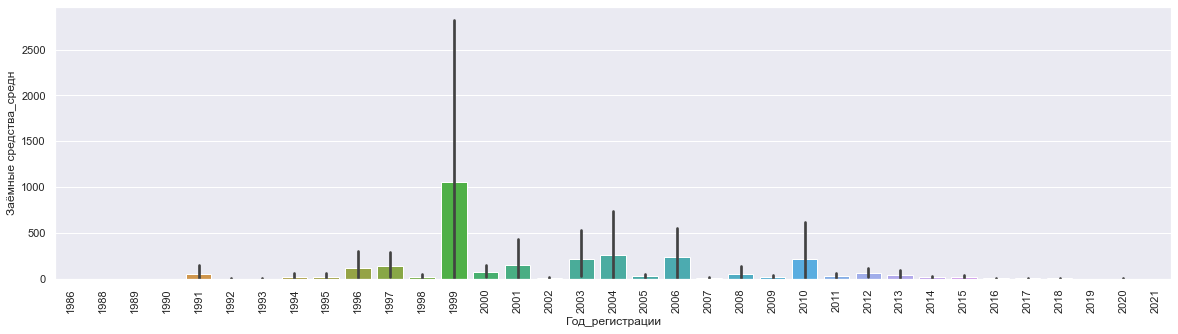

In [98]:
plt.figure(figsize=(20,5))
sns.barplot(x="Год_регистрации", y="Заёмные средства_средн", data=data)
plt.xticks(rotation=90)
plt.show();

*НКО, зарегистрированные в 1999 имеют наибольшую закредитованность (не забываем в 1998 году удалили фонд Чернодырдина с суммой заемных средств в 451560 тыс.рублей). У компаний, зарегистрированные после 2010 года, объем заемных средств стремиться к нулю.*

In [99]:
# df = data[data["Год_регистрации"].isin([1998,1999])]
df_ = data[data["Год_регистрации"]==1999]
print(f'Количество компаний, зарегистрированных в 1999 годах: {df_.shape[0]}')

Количество компаний, зарегистрированных в 1999 годах: 104


В каких годах они брали краткосрочные займы

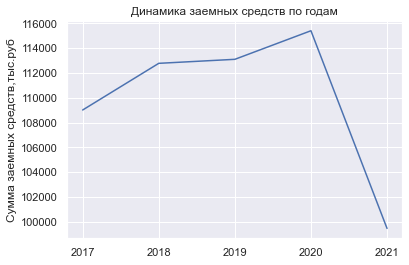

In [100]:
col = [f'{i}, Заёмные средства (краткосрочные), KRUB' for i in range(2017, 2022)]
tab = pd.DataFrame(df_[col].sum())
tab.index = [col[i].split(",")[0] for i in range(5)]
plt.plot(tab.index, tab[0])
plt.title('Динамика заемных средств по годам')
plt.ylabel('Сумма заемных средств,тыс.руб');

***Компании, зарегистрированные в 1999 году наиболее сильно кредитовались в 2020, рост такого кредитования шел с 2018 года и в 2021 резко упал***

Посмотрим на компании, взявшие займы в 2020 году, по их финансовым показателям

In [101]:
df = df_[df_["2020, Заёмные средства (краткосрочные), KRUB"] > 0]
print(f'Количество компаний, взявших займ в 2020: {df.shape[0]}')

Количество компаний, взявших займ в 2020: 8


In [102]:
# df = df[df["Заёмные средства_средн"] > 0]
# print(f'Количество компаний, взявших займ: {df.shape[0]}')

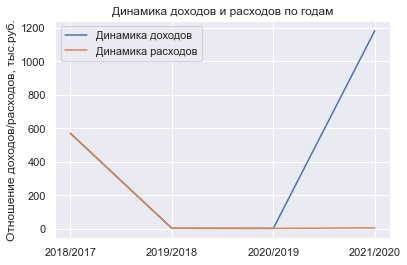

In [103]:
col1 = [f'{i}, Динамика доходов' for i in [
    '2018/2017', '2019/2018', '2020/2019', '2021/2020']]
col2 = [f'{i}, Динамика расходов' for i in [
    '2018/2017', '2019/2018', '2020/2019', '2021/2020']]
df1 = pd.DataFrame(df[col1].sum(), columns=['Динамика доходов']).reindex(
    [col1[i].split(",")[0] for i in range(4)], method='bfill')
df2 = pd.DataFrame(df[col2].sum(), columns=['Динамика расходов']).reindex(
    [col2[i].split(",")[0] for i in range(4)], method='bfill')
df3 = df1.join(df2, how='inner')

for k in df3.columns:
    plt.plot(df3.index, df3[k])
    plt.title('Динамика доходов и расходов по годам')
    plt.ylabel('Отношение доходов/расходов, тыс.руб.')
    plt.legend(df3)

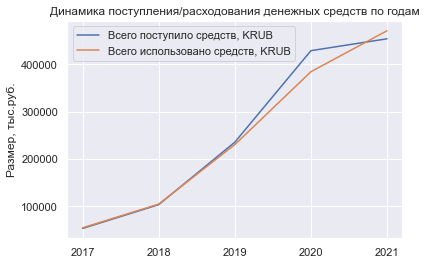

In [104]:
col1 = [f'{i}, Всего поступило средств, KRUB' for i in range(2017,2022)]
col2 = [f'{i}, Всего использовано средств, KRUB' for i in range(2017,2022)]

df1 = pd.DataFrame(df[col1].mean(), columns=['Всего поступило средств, KRUB']).reindex(
    [col1[i].split(",")[0] for i in range(5)], method='bfill')
df2 = pd.DataFrame(df[col2].mean(), columns=['Всего использовано средств, KRUB']).reindex(
    [col2[i].split(",")[0] for i in range(5)], method='bfill')
df3 = df1.join(df2, how='inner')

for k in df3.columns:
    plt.plot(df3.index, df3[k])
    plt.title('Динамика поступления/расходования денежных средств по годам')
    plt.ylabel('Размер, тыс.руб.')
    plt.legend(df3)

**Вывод:** У этих компаний динамика расходов превышала динамику доходов в 2018 и в 2020 годах. За период с 2017 по 2019 года величина расходования денежных средств была равна их поступлению, в 2020 г. поступления денежных средств даже значительно увеличились, но уже в 2021 г. расход превысил поступления. Пока финансовые причины получения краткосрочных займов в 2020 г. у этих компаний неочевидны, поступления денежных средств хватало на покрытие расходов.

Посмотрим на корреляцию краткосрочных заемных средств, полученных в 2020 году, с другими показателями компаний по методу Пирсона и Спирмена и отберем показатели, наиболее сильно связанные с заемными средствами

In [105]:
df_2020_sp = sorted(zip(df[org_col+col_2017+col_2018+col_2019+col_2020].columns, df[org_col+col_2017 +
                 col_2018+col_2019+col_2020].corrwith(df["2020, Заёмные средства (краткосрочные), KRUB"], method='spearman')), key=lambda x: -x[1])

df_2020_pe = sorted(zip(df[org_col+col_2017+col_2018+col_2019+col_2020].columns, df[org_col+col_2017 +
                 col_2018+col_2019+col_2020].corrwith(df["2020, Заёмные средства (краткосрочные), KRUB"])), key=lambda x: -x[1])

# показатели наиболее скоррелированные с заемными средствами в 2020
col_sp, value =zip(*df_2020_sp)
col_sp = set(list(col_sp[:10]))
col_pe, value =zip(*df_2020_pe)
col_pe = set(list(col_pe[:10]))
col = sorted(list(col_sp.union(col_pe)))
col, len(col)

C:\Users\Ludmila\AppData\Roaming\Python\Python38\site-packages\scipy\stats\stats.py:4196: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


(['2017, Дебиторская задолженность, KRUB',
  '2017, Коммерческие расходы, KRUB',
  '2017, Прибыль (убыток) от продажи, KRUB',
  '2017, Приобретение основных средств, инвентаря и иного имущества, KRUB',
  '2017, Расходы на целевые мероприятия, KRUB',
  '2017, Себестоимость продаж, KRUB',
  '2017, Среднесписочная численность работников',
  '2017, Управленческие расходы, KRUB',
  'Год_регистрации',
  'Код налогоплательщика',
  'Наименование',
  'Организационно-правовая форма',
  'Регистрационный номер'],
 13)

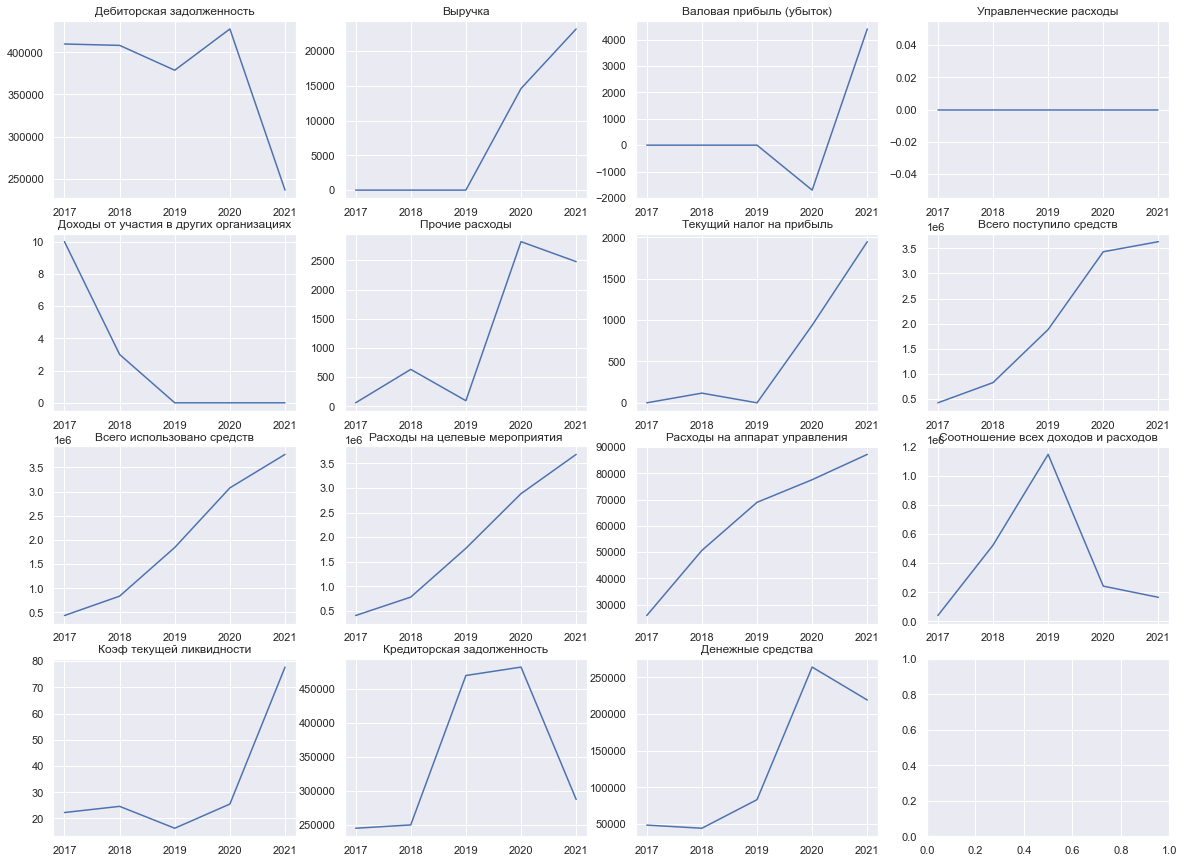

In [106]:
df1 = pd.DataFrame(df[[f'{i}, Дебиторская задолженность, KRUB' for i in range(2017, 2022)]].sum(),
                     columns=['Дебиторская задолженность, KRUB']).\
                    reindex(['2017', '2018', '2019', '2020', '2021'], method='bfill')
df2 = pd.DataFrame(df[[f'{i}, Выручка, KRUB' for i in range(2017, 2022)]].sum(),
                     columns=['Выручка, KRUB']).\
                    reindex(['2017', '2018', '2019', '2020', '2021'], method='bfill')
df3 = pd.DataFrame(df[[f'{i}, Валовая прибыль (убыток), KRUB' for i in range(2017, 2022)]].sum(),
                     columns=['Валовая прибыль (убыток), KRUB']).\
                    reindex(['2017', '2018', '2019', '2020', '2021'], method='bfill')
df4 = pd.DataFrame(df[[f'{i}, Управленческие расходы, KRUB' for i in range(2017, 2022)]].sum(),
                     columns=['Управленческие расходы, KRUB']).\
                    reindex(['2017', '2018', '2019', '2020', '2021'], method='bfill')
df5 = pd.DataFrame(df[[f'{i}, Доходы от участия в других организациях, KRUB' for i in range(2017, 2022)]].sum(),
                     columns=['Доходы от участия в других организациях, KRUB']).\
                    reindex(['2017', '2018', '2019', '2020', '2021'], method='bfill')
df6 = pd.DataFrame(df[[f'{i}, Прочие расходы, KRUB' for i in range(2017, 2022)]].sum(),
                     columns=['Прочие расходы, KRUB']).\
                    reindex(['2017', '2018', '2019', '2020', '2021'], method='bfill')
df7 = pd.DataFrame(df[[f'{i}, Текущий налог на прибыль, KRUB' for i in range(2017, 2022)]].sum(),
                     columns=['Текущий налог на прибыль, KRUB']).\
                    reindex(['2017', '2018', '2019', '2020', '2021'], method='bfill')
df8 = pd.DataFrame(df[[f'{i}, Всего поступило средств, KRUB' for i in range(2017, 2022)]].sum(),
                     columns=['Всего поступило средств, KRUB']).\
                    reindex(['2017', '2018', '2019', '2020', '2021'], method='bfill')
df9 = pd.DataFrame(df[[f'{i}, Всего использовано средств, KRUB' for i in range(2017, 2022)]].sum(),
                     columns=['Всего использовано средств, KRUB']).\
                    reindex(['2017', '2018', '2019', '2020', '2021'], method='bfill')
df10 = pd.DataFrame(df[[f'{i}, Расходы на целевые мероприятия, KRUB' for i in range(2017, 2022)]].sum(),
                     columns=['Расходы на целевые мероприятия, KRUB']).\
                    reindex(['2017', '2018', '2019', '2020', '2021'], method='bfill')
df11 = pd.DataFrame(df[[f'{i}, Расходы на содержание аппарата управления, KRUB' for i in range(2017, 2022)]].sum(),
                     columns=['Расходы на содержание аппарата управления, KRUB']).\
                    reindex(['2017', '2018', '2019', '2020', '2021'], method='bfill')
df12 = pd.DataFrame(df[[f'{i}, Соотношение всех доходов и расходов' for i in range(2017, 2022)]].sum(),
                     columns=['Соотношение всех доходов и расходов']).\
                    reindex(['2017', '2018', '2019', '2020', '2021'], method='bfill')
df13 = pd.DataFrame(df[[f'{i}, Коэф текущей ликвидности' for i in range(2017, 2022)]].sum(),
                     columns=['Коэф текущей ликвидности']).\
                    reindex(['2017', '2018', '2019', '2020', '2021'], method='bfill')
df14 = pd.DataFrame(df[[f'{i}, Кредиторская задолженность, KRUB' for i in range(2017, 2022)]].sum(),
                     columns=['Кредиторская задолженность, KRUB']).\
                    reindex(['2017', '2018', '2019', '2020', '2021'], method='bfill')
df15 = pd.DataFrame(df[[f'{i}, Денежные средства и денежные эквиваленты, KRUB' for i in range(2017, 2022)]].sum(),
                     columns=['Денежные средства и денежные эквиваленты, KRUB']).\
                    reindex(['2017', '2018', '2019', '2020', '2021'], method='bfill')

fig, axes = plt.subplots(4, 4, figsize = (20,15))
axes[0][0].plot(df1.index, df1)
axes[0][0].set_title('Дебиторская задолженность')

axes[0][1].plot(df2.index, df2)
axes[0][1].set_title('Выручка')

axes[0][2].plot(df3.index, df3)
axes[0][2].set_title('Валовая прибыль (убыток)')

axes[0][3].plot(df4.index, df4)
axes[0][3].set_title('Управленческие расходы')

axes[1][0].plot(df5.index, df5)
axes[1][0].set_title('Доходы от участия в других организациях')

axes[1][1].plot(df6.index, df6)
axes[1][1].set_title('Прочие расходы')

axes[1][2].plot(df7.index, df7)
axes[1][2].set_title('Текущий налог на прибыль')

axes[1][3].plot(df8.index, df8)
axes[1][3].set_title('Всего поступило средств')

axes[2][0].plot(df9.index, df9)
axes[2][0].set_title('Всего использовано средств')

axes[2][1].plot(df10.index, df10)
axes[2][1].set_title('Расходы на целевые мероприятия')

axes[2][2].plot(df11.index, df11)
axes[2][2].set_title('Расходы на аппарат управления')

axes[2][3].plot(data12.index, data12)
axes[2][3].set_title('Соотношение всех доходов и расходов')

axes[3][0].plot(df13.index, df13)
axes[3][0].set_title('Коэф текущей ликвидности')

axes[3][1].plot(df14.index, df14)
axes[3][1].set_title('Кредиторская задолженность')

axes[3][2].plot(df15.index, df15)
axes[3][2].set_title('Денежные средства');

**Вывод:** Для компаний, зарегистрированных в 1999 году, максимальное заимствование происходило в 2020 году. По финансовым показателям причинами этого могло стать наличие большой дебиторской задолженности и кредиторской задолженности, использование денежных средств ежегодно растет, хотя в 2020 году оно не превысило поступивших денежных средств. 

3 общественных фонда имеют отрицательные капитал и резервы, а также коэффициенты финансовой устойчивости и независимости, что свидетельствуют об отсутствии собственных средств и что их имущество сформировано из заимствованных средств. Эти организации фактически являются банкротами, по всей видимости они берут займы для покрытия недостатка собственного капитала, чтобы продолжать осуществлять свою деятельность. Особенно это наглядно видно на фонде `ВЕТЕРАН, ФОНД СОЦИАЛЬНОЙ ЗАЩИТЫ`, у которого напротяжении периода с 2017 по 2020 отрицательные показатели капитала и резервов и соизмеримые с этим суммы краткосрочных займов. Доля этих компаний с плохими финансовыми показателями составляет `32,60%` от всех компаний, взявших в 2020 г. займы.

In [107]:
df[(df['К_фин_уст_средн']<0) & (df['К_фин_незав_средн']<0)]["2020, Заёмные средства (краткосрочные), KRUB"].sum()*100/\
df["2020, Заёмные средства (краткосрочные), KRUB"].sum()

32.60170703175772

In [108]:
# Иногда отрицательное значение
mask = df[(df['2017, Капитал и резервы, KRUB']<0) | (df['2018, Капитал и резервы, KRUB']<0) |
    (df['2019, Капитал и резервы, KRUB']<0) | (df['2020, Капитал и резервы, KRUB']<0) | 
    (df['2021, Капитал и резервы, KRUB']<0)]
display(mask)
print(len(mask))

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB",...,"2017, Расходы на целевые мероприятия, KRUB","2018, Расходы на целевые мероприятия, KRUB","2019, Расходы на целевые мероприятия, KRUB","2020, Расходы на целевые мероприятия, KRUB","2021, Расходы на целевые мероприятия, KRUB","2017, Расходы на содержание аппарата управления, KRUB","2018, Расходы на содержание аппарата управления, KRUB","2019, Расходы на содержание аппарата управления, KRUB","2020, Расходы на содержание аппарата управления, KRUB","2021, Расходы на содержание аппарата управления, KRUB","2017, Приобретение основных средств, инвентаря и иного имущества, KRUB","2018, Приобретение основных средств, инвентаря и иного имущества, KRUB","2019, Приобретение основных средств, инвентаря и иного имущества, KRUB","2020, Приобретение основных средств, инвентаря и иного имущества, KRUB","2021, Приобретение основных средств, инвентаря и иного имущества, KRUB","2017, Всего использовано средств, KRUB","2018, Всего использовано средств, KRUB","2019, Всего использовано средств, KRUB","2020, Всего использовано средств, KRUB","2021, Всего 

3


In [109]:
# Всегда отрицательное значение
mask = df[(df['К_фин_уст_средн']<0) & (df['К_фин_незав_средн']<0)]
display(mask)
print(len(mask))

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,Код ОКОПФ,"2017, Среднесписочная численность работников","2018, Среднесписочная численность работников","2017, Дебиторская задолженность, KRUB","2018, Дебиторская задолженность, KRUB","2019, Дебиторская задолженность, KRUB","2020, Дебиторская задолженность, KRUB","2021, Дебиторская задолженность, KRUB","2017, Денежные средства и денежные эквиваленты, KRUB","2018, Денежные средства и денежные эквиваленты, KRUB","2019, Денежные средства и денежные эквиваленты, KRUB","2020, Денежные средства и денежные эквиваленты, KRUB","2021, Денежные средства и денежные эквиваленты, KRUB","2017, Капитал и резервы, KRUB","2018, Капитал и резервы, KRUB","2019, Капитал и резервы, KRUB","2020, Капитал и резервы, KRUB","2021, Капитал и резервы, KRUB","2017, Заёмные средства (краткосрочные), KRUB","2018, Заёмные средства (краткосрочные), KRUB","2019, Заёмные средства (краткосрочные), KRUB","2020, Заёмные средства (краткосрочные), KRUB","2021, Заёмные средства (краткосрочные), KRUB","2017, Кредиторская задолженность, KRUB","2018, Кредиторская задолженность, KRUB","2019, Кредиторская задолженность, KRUB","2020, Кредиторская задолженность, KRUB","2021, Кредиторская задолженность, KRUB","2017, Пассивы всего, KRUB","2018, Пассивы всего, KRUB","2019, Пассивы всего, KRUB","2020, Пассивы всего, KRUB","2021, Пассивы всего, KRUB","2017, Выручка, KRUB","2018, Выручка, KRUB","2019, Выручка, KRUB","2020, Выручка, KRUB","2021, Выручка, KRUB","2017, Себестоимость продаж, KRUB","2018, Себестоимость продаж, KRUB","2019, Себестоимость продаж, KRUB","2020, Себестоимость продаж, KRUB","2021, Себестоимость продаж, KRUB","2017, Валовая прибыль (убыток), KRUB","2018, Валовая прибыль (убыток), KRUB","2019, Валовая прибыль (убыток), KRUB","2020, Валовая прибыль (убыток), KRUB","2021, Валовая прибыль (убыток), KRUB","2017, Коммерческие расходы, KRUB","2018, Коммерческие расходы, KRUB","2019, Коммерческие расходы, KRUB","2020, Коммерческие расходы, KRUB","2021, Коммерческие расходы, KRUB","2017, Управленческие расходы, KRUB","2018, Управленческие расходы, KRUB","2019, Управленческие расходы, KRUB","2020, Управленческие расходы, KRUB","2021, Управленческие расходы, KRUB","2017, Прибыль (убыток) от продажи, KRUB","2018, Прибыль (убыток) от продажи, KRUB","2019, Прибыль (убыток) от продажи, KRUB","2020, Прибыль (убыток) от продажи, KRUB","2021, Прибыль (убыток) от продажи, KRUB","2017, Доходы от участия в других организациях, KRUB","2018, Доходы от участия в других организациях, KRUB","2019, Доходы от участия в других организациях, KRUB","2020, Доходы от участия в других организациях, KRUB","2021, Доходы от участия в других организациях, KRUB","2017, Проценты к получению, KRUB","2018, Проценты к получению, KRUB","2019, Проценты к получению, KRUB","2020, Проценты к получению, KRUB",...,"2017, Расходы на целевые мероприятия, KRUB","2018, Расходы на целевые мероприятия, KRUB","2019, Расходы на целевые мероприятия, KRUB","2020, Расходы на целевые мероприятия, KRUB","2021, Расходы на целевые мероприятия, KRUB","2017, Расходы на содержание аппарата управления, KRUB","2018, Расходы на содержание аппарата управления, KRUB","2019, Расходы на содержание аппарата управления, KRUB","2020, Расходы на содержание аппарата управления, KRUB","2021, Расходы на содержание аппарата управления, KRUB","2017, Приобретение основных средств, инвентаря и иного имущества, KRUB","2018, Приобретение основных средств, инвентаря и иного имущества, KRUB","2019, Приобретение основных средств, инвентаря и иного имущества, KRUB","2020, Приобретение основных средств, инвентаря и иного имущества, KRUB","2021, Приобретение основных средств, инвентаря и иного имущества, KRUB","2017, Всего использовано средств, KRUB","2018, Всего использовано средств, KRUB","2019, Всего использовано средств, KRUB","2020, Всего использовано средств, KRUB","2021, Всего 

3


**2. Среднесписочная численность сотрудников**

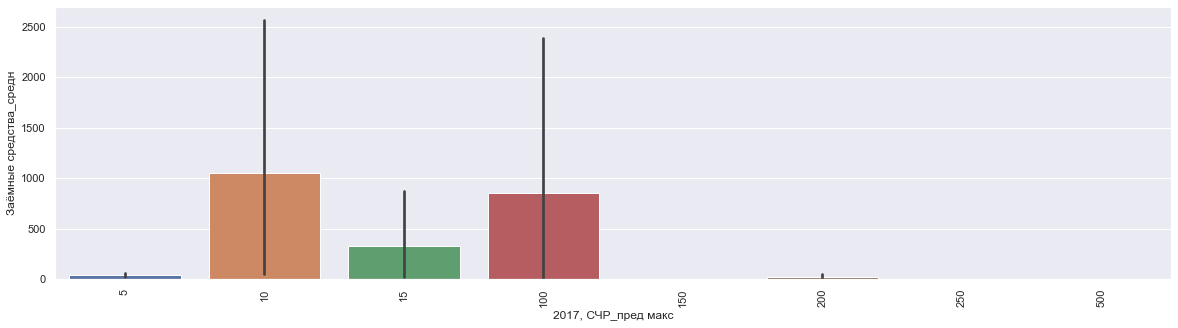

In [186]:
plt.figure(figsize=(20,5))
sns.barplot(x="2017, СЧР_пред макс", y="Заёмные средства_средн", data=data)
plt.xticks(rotation=90)
plt.show();

In [209]:
df = data[data["2017, СЧР_пред макс"].isin([10,15,100])]
# df = data[data["2017, СЧР_пред макс"]==15]
print(f'Количество компаний c численностью сотрудников 6-10, 11-15 и 51-100: {df.shape[0]}')

Количество компаний c численностью сотрудников 6-10, 11-15 и 51-100: 286


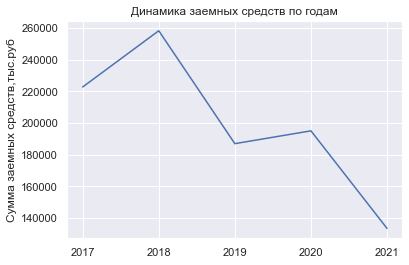

In [210]:
col = [f'{i}, Заёмные средства (краткосрочные), KRUB' for i in range(2017, 2022)]
tab = pd.DataFrame(df[col].sum())
tab.index = [col[i].split(",")[0] for i in range(5)]
plt.plot(tab.index, tab[0])
plt.title('Динамика заемных средств по годам')
plt.ylabel('Сумма заемных средств,тыс.руб');

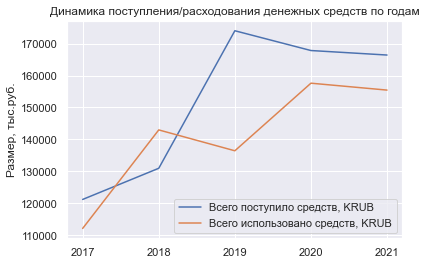

In [211]:
col1 = [f'{i}, Всего поступило средств, KRUB' for i in range(2017,2022)]
col2 = [f'{i}, Всего использовано средств, KRUB' for i in range(2017,2022)]

df1 = pd.DataFrame(df[col1].mean(), columns=['Всего поступило средств, KRUB']).reindex(
    [col1[i].split(",")[0] for i in range(5)], method='bfill')
df2 = pd.DataFrame(df[col2].mean(), columns=['Всего использовано средств, KRUB']).reindex(
    [col2[i].split(",")[0] for i in range(5)], method='bfill')
df3 = df1.join(df2, how='inner')

for k in df3.columns:
    plt.plot(df3.index, df3[k])
    plt.title('Динамика поступления/расходования денежных средств по годам')
    plt.ylabel('Размер, тыс.руб.')
    plt.legend(df3)

**Посмотрим из каких регионов компании в 2018 и 2020 годах брали краткосрочные займы и какая у них организационно-правовая форма**

In [164]:
spisok_com_reg = list(
    data[data["2018, Заёмные средства (краткосрочные), KRUB"] > 0]["Регион регистрации"].unique())
number_all_reg = {i: [data[(data["2018, Заёмные средства (краткосрочные), KRUB"] > 0) & (data["Регион регистрации"] == i)]
                      ["Регион регистрации"].value_counts()[0],
                      len(data[data["Регион регистрации"] == i])] for i in spisok_com_reg}

d = {"Количество компаний": [number_all_reg[i][0] for i in number_all_reg.keys()],
     "% компаний": [round(number_all_reg[i][0]*100/number_all_reg[i][1], 1) for i in number_all_reg.keys()]}
display(pd.DataFrame(d, index=number_all_reg.keys()).transpose())
print(f'Количество регионов из {len(data["Регион регистрации"].value_counts())} \
регионов, в которых компании брали займ в 2018 году: \
{len(data[data["2018, Заёмные средства (краткосрочные), KRUB"] > 0]["Регион регистрации"].value_counts())} ~\
{len(data[data["2018, Заёмные средства (краткосрочные), KRUB"] > 0]["Регион регистрации"].value_counts())*100/len(data["Регион регистрации"].value_counts())} %')

print(f'Количество компаний из {data.shape[0]} взявших займ в 2018 году: \
{data[data["2018, Заёмные средства (краткосрочные), KRUB"] > 0].shape[0]} ~\
{data[data["2018, Заёмные средства (краткосрочные), KRUB"] > 0].shape[0]/data.shape[0]} %')

,Москва,Санкт-Петербург,Волгоградская область,Башкортостан (Республика),Ленинградская область,Челябинская область,Пермский край,Удмуртская Республика,Краснодарский край,Кемеровская область,Забайкальский край,Самарская область,Красноярский край,Московская область,Амурская область,Нижегородская область,Новосибирская область,Калужская область,Алтайский край,Вологодская область,Тульская область,Тюменская область,Ростовская область,Кабардино-Балкарская Республика,Республика Татарстан,Республика Крым,Севастополь,Архангельская область,Тверская область,Курская область,Карелия (Республика),Свердловская область,Иркутская область,Коми (Республика),Оренбургская область,Мурманская область,Пензенская область,Калмыкия (Республика),Рязанская область,Саха (Республика) (Якутия),Саратовская область,Омская область,Ставропольский край,Смоленская область,Дагестан (Республика),Владимирская область
Количество компаний,93.00,33.00,5.00,2.00,1.00,5.00,6.00,3.00,9.00,2.00,1.00,6.00,6.00,15.00,2.00,6.00,2.00,3.00,3.00,4.00,2.00,5.00,5.00,3.00,6.00,3.00,2.00,1.00,2.00,1.00,2.00,7.00,3.00,2.00,1.00,2.00,1.00,1.00,1.00,2.00,2.00,1.00,1.00,1.00,1.00,1.00
% компаний,6.20,7.10,7.20,1.20,2.00,4.80,7.30,5.00,7.40,2.80,5.90,4.60,4.50,5.60,16.70,5.30,1.50,7.00,4.40,9.50,6.10,4.50,4.20,10.30,3.00,5.00,8.70,4.80,4.40,3.30,6.10,4.50,2.30,10.00,2.70,14.30,2.60,12.50,3.40,7.40,3.60,0.90,1.90,6.70,2.70,3.00


Количество регионов из 83 регионов, в которых компании брали займ в 2018 году: 46 ~55.42168674698795 %
Количество компаний из 5851 взявших займ в 2018 году: 266 ~0.04546231413433601 %


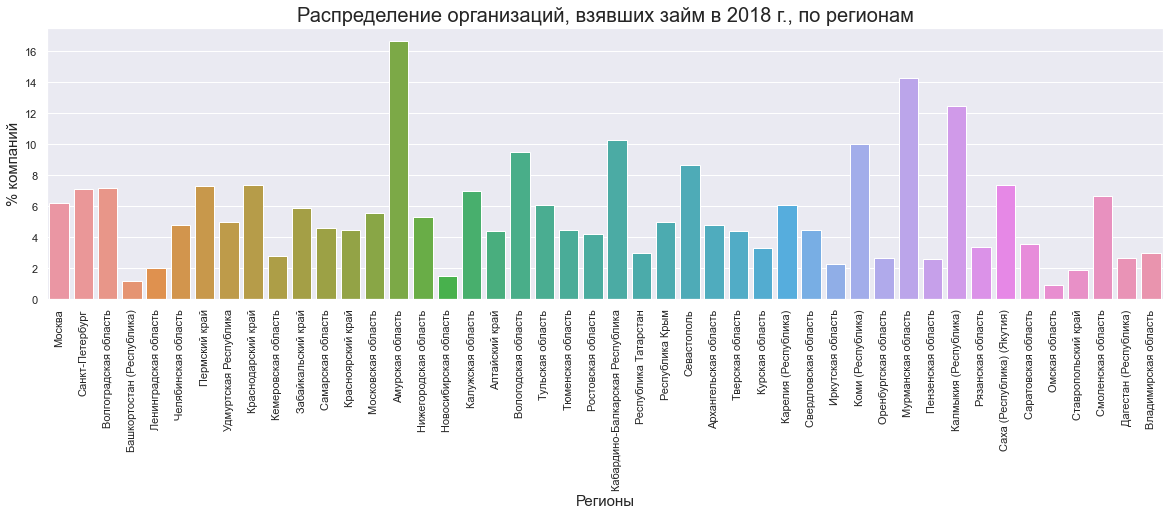

In [165]:
df1 = pd.DataFrame(d, index=number_all_reg.keys()).reset_index()
plt.figure(figsize=(20,5))
plt.title('Распределение организаций, взявших займ в 2018 г., по регионам', fontsize=FONT_TITLE)
sns.barplot(x='index', y='% компаний', data=df1);
plt.ylabel('% компаний от всех в регионе', fontsize=FONT_LABEL)
plt.xlabel('Регионы', fontsize=FONT_LABEL)
plt.xticks(rotation=90)
plt.show();

In [174]:
spisok_com_reg = list(
    data[data["2020, Заёмные средства (краткосрочные), KRUB"] > 0]["Регион регистрации"].unique())
number_all_reg = {i: [data[(data["2020, Заёмные средства (краткосрочные), KRUB"] > 0) & (data["Регион регистрации"] == i)]
                      ["Регион регистрации"].value_counts()[0],
                      len(data[data["Регион регистрации"] == i])] for i in spisok_com_reg}

d = {"Количество компаний": [number_all_reg[i][0] for i in number_all_reg.keys()],
     "% компаний": [round(number_all_reg[i][0]*100/number_all_reg[i][1], 1) for i in number_all_reg.keys()]}
display(pd.DataFrame(d, index=number_all_reg.keys()).transpose())
print(f'Количество регионов из {len(data["Регион регистрации"].value_counts())} \
регионов, в которых компании брали займ в 2020 году: \
{len(data[data["2020, Заёмные средства (краткосрочные), KRUB"] > 0]["Регион регистрации"].value_counts())} ~\
{len(data[data["2020, Заёмные средства (краткосрочные), KRUB"] > 0]["Регион регистрации"].value_counts())*100/len(data["Регион регистрации"].value_counts())} %')

print(f'Количество компаний из {data.shape[0]} взявших займ в 2020 году: \
{data[data["2020, Заёмные средства (краткосрочные), KRUB"] > 0].shape[0]} ~\
{data[data["2020, Заёмные средства (краткосрочные), KRUB"] > 0].shape[0]/data.shape[0]} %')

,Москва,Санкт-Петербург,Волгоградская область,Калининградская область,Челябинская область,Башкортостан (Республика),Пермский край,Краснодарский край,Марий Эл (Республика),Воронежская область,Московская область,Самарская область,Свердловская область,Нижегородская область,Новосибирская область,Республика Татарстан,Калужская область,Тюменская область,Алтайский край,Вологодская область,Тульская область,Кемеровская область,Ростовская область,Кабардино-Балкарская Республика,Красноярский край,Севастополь,Удмуртская Республика,Тверская область,Курская область,Республика Крым,Амурская область,Коми (Республика),Новгородская область,Мурманская область,Омская область,Рязанская область,Архангельская область,Карелия (Республика),Приморский край,Орловская область,Саха (Республика) (Якутия),Иркутская область,Саратовская область,Хабаровский край,Смоленская область
Количество компаний,96.00,27.00,4.00,1.00,3.00,3.00,7.00,13.00,1.00,3.00,12.00,6.00,8.00,3.00,3.00,11.00,3.00,3.00,4.00,3.00,2.00,1.00,2.00,2.00,6.00,1.00,1.00,2.00,1.00,2.00,1.00,2.00,1.00,2.00,2.00,3.00,1.00,1.00,2.00,1.00,2.00,2.00,2.00,1.00,1.00
% компаний,6.30,5.80,5.80,2.60,2.90,1.80,8.50,10.70,6.20,4.80,4.50,4.60,5.10,2.60,2.20,5.50,7.00,2.70,5.90,7.10,6.10,1.40,1.70,6.90,4.50,4.30,1.70,4.40,3.30,3.30,8.30,10.00,7.10,14.30,1.80,10.30,4.80,3.00,4.90,5.00,7.40,1.60,3.60,2.50,6.70


Количество регионов из 83 регионов, в которых компании брали займ в 2020 году: 45 ~54.21686746987952 %
Количество компаний из 5851 взявших займ в 2020 году: 258 ~0.044095026491198085 %


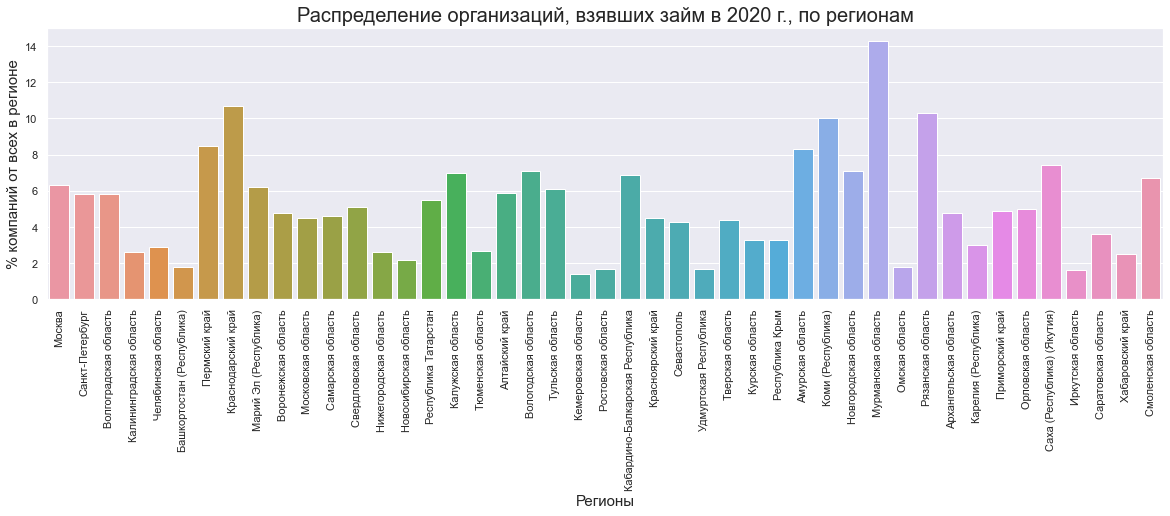

In [175]:
df1 = pd.DataFrame(d, index=number_all_reg.keys()).reset_index()
plt.figure(figsize=(20,5))
plt.title('Распределение организаций, взявших займ в 2020 г., по регионам', fontsize=FONT_TITLE)
sns.barplot(x='index', y='% компаний', data=df1);
plt.ylabel('% компаний от всех в регионе', fontsize=FONT_LABEL)
plt.xlabel('Регионы', fontsize=FONT_LABEL)
plt.xticks(rotation=90)
plt.show();

In [181]:
spisok_com = list(data[data["2018, Заёмные средства (краткосрочные), KRUB"] > 0]["Организационно-правовая форма"].unique())
number_all = {i:[data[(data["2018, Заёмные средства (краткосрочные), KRUB"] > 0) & (data["Организационно-правовая форма"] == i)]\
                 ["Организационно-правовая форма"].value_counts()[0],\
                 len(data[data["Организационно-правовая форма"] == i])] for i in spisok_com}

d = {"Количество компаний": [number_all[i][0] for i in number_all.keys()],\
     "% компаний": [round(number_all[i][0]*100/number_all[i][1],1) for i in number_all.keys()]}
display(pd.DataFrame(d, index=number_all.keys()).transpose())
print(f'Количество фондов: {len(data[data["2018, Заёмные средства (краткосрочные), KRUB"] > 0]["Организационно-правовая форма"].value_counts())}')

,Благотворительные фонды,Общественные фонды,Фонды,Экологические фонды,Общественные организации
Количество компаний,205.00,56.00,2.00,2.00,1.00
% компаний,4.10,6.80,6.10,10.50,33.30


Количество фондов: 5


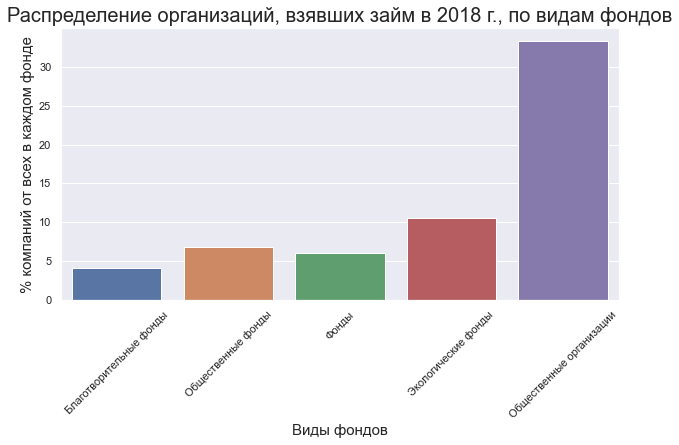

In [183]:
df1 = pd.DataFrame(d, index=number_all.keys()).reset_index()
plt.figure(figsize=(10,5))
plt.title('Распределение организаций, взявших займ в 2018 г., по видам фондов', fontsize=FONT_TITLE)
sns.barplot(x='index', y='% компаний', data=df1);
plt.ylabel('% компаний от всех в каждом фонде', fontsize=FONT_LABEL)
plt.xlabel('Виды фондов', fontsize=FONT_LABEL)
plt.xticks(rotation=45)
plt.show();

In [184]:
spisok_com = list(data[data["2020, Заёмные средства (краткосрочные), KRUB"] > 0]["Организационно-правовая форма"].unique())
number_all = {i:[data[(data["2020, Заёмные средства (краткосрочные), KRUB"] > 0) & (data["Организационно-правовая форма"] == i)]\
                 ["Организационно-правовая форма"].value_counts()[0],\
                 len(data[data["Организационно-правовая форма"] == i])] for i in spisok_com}

d = {"Количество компаний": [number_all[i][0] for i in number_all.keys()],\
     "% компаний": [round(number_all[i][0]*100/number_all[i][1],1) for i in number_all.keys()]}
display(pd.DataFrame(d, index=number_all.keys()).transpose())
print(f'Количество фондов: {len(data[data["2020, Заёмные средства (краткосрочные), KRUB"] > 0]["Организационно-правовая форма"].value_counts())}')

,Общественные фонды,Благотворительные фонды,Фонды,Экологические фонды,Общественные организации
Количество компаний,52.00,201.00,3.00,1.00,1.00
% компаний,6.40,4.00,9.10,5.30,33.30


Количество фондов: 5


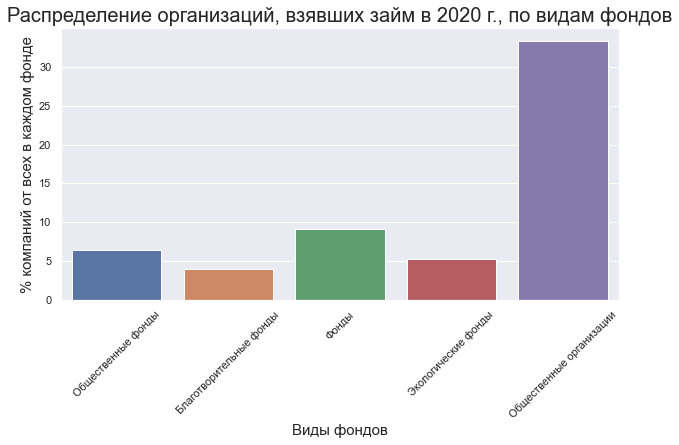

In [185]:
df1 = pd.DataFrame(d, index=number_all.keys()).reset_index()
plt.figure(figsize=(10,5))
plt.title('Распределение организаций, взявших займ в 2020 г., по видам фондов', fontsize=FONT_TITLE)
sns.barplot(x='index', y='% компаний', data=df1);
plt.ylabel('% компаний от всех в каждом фонде', fontsize=FONT_LABEL)
plt.xlabel('Виды фондов', fontsize=FONT_LABEL)
plt.xticks(rotation=45)
plt.show();

***Выводы:*** 
1. Наибольшее количество краткосрочного заимствования у НКО было в 2018 и 2020 годах.
2. Получение краткосрочных займов в 2018 г. связано в первую очередь с превышение расходования денежных средств над их поступлением и в большей части на собственные расходы (расходы на аппарат управления) и налог на прибыль. Про 2020 г. такого сказать нельзя, т.к. поступления превышают суммы расхода, а налог на прибыль незначителен, возможно займы были взяты для расширения деятельности фондов.
3. НКО, зарегистрированные в 1999 имеют наибольшую закредитованность (удалили из рассмотрения фонд Чернодырдина с суммой заемных средств в 451560 тыс.рублей, зарегистрированный в 1998 году). У компаний, зарегистрированных после 2010 года, объем заемных средств стремиться к нулю.
4. Компании со среднесписочной численностью от 6 до 10 человек и от 11 до 15 человек, а также от 51 до 100 человек имеют наибольший уровень заимствования. При чем для компаний с численностью от 6 до 10 человек, а таких 114 компаний, и от 11 до 15 человек, а таких 127 компаний, расходы сильно превышали поступления денежных средств в 2018 году, в 2020 году такого превышения уже нет, поступления значительно покрывают расходы. Для компаний с численностью от 51 до 100 человек, а таких компаний 45, в 2018 г. не существенно превышали поступления, тогда как в 2020 г. денежных поступлений не хватало на произведенные расходы. Это свидетельствует о значительном расходовании денежных средств на персонал в 2018 г. для компаний от 6 до 15 и в 2020 г. для компаний с численностью от 51 до 100 человек.
5. В 2018 и 2020 годах заимствовалось примерно одинаковое количество компаний ~0.04% от всех компаний в выборке и из примерно одинакового количества регионов ~ 55% из всех регионов. 
6. Из 5 категорий фондов, представленных в выборке, к заимствованию прибегали 33,3% компаний из общественных организаций. Благотворительные фонды, а их большинство в выборке, меньше всех пользовались краткосрочными займами.